In [1]:
from tensorflow import keras

from astropy.io import fits
from astropy.table import Table
from astropy.io.fits import Column
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import richardsplot
import os

In [2]:
dat = pd.read_csv("../data/HST_Chandra_Redshifts.csv")
dat

Identifier Data_Set         L1550  SDSS  OtherOpt  No_Optical  \
0   002019.22-110609.2      HST  8.850000e+29  True     False       False   
1   082024.21+233450.4      HST  7.830000e+29  True     False       False   
2   082658.85+061142.6      HST  9.610000e+29  True     False       False   
3   083332.92+164411.0      HST  8.290000e+29  True     False       False   
4   083510.36+035901.1      HST  6.300000e+29  True     False       False   
5   085116.14+424328.8      HST  1.030000e+30  True     False       False   
6   091451.42+421957.0      HST  7.440000e+29  True     False       False   
7   093502.52+433110.6      HST  3.890000e+30  True     False       False   
8   100054.96+262242.4      HST  7.170000e+29  True     False       False   
9   103320.65+274024.2      HST  9.280000e+29  True     False       False   
10  111138.66+575030.0      HST  6.790000e+29  True     False       False   
11  111941.12+595108.7      HST  1.130000e+30  True     False       False   
12  112224.15+031802.6      HST  9.280000e+29  True     False       False   
13  112614.93+310146.6      HST  7.050000e+29  True     False       False   
14  113327.78+032719.1      HST  4.580000e+29  True     False       False   
15  113923.66+002301.6      HST  1.490000e+30  True     False       False   
16  123734.47+444731.7      HST  1.190000e+30  True     False       False   
17  125415.55+480850.6      HST  8.420000e+29  True     False       False   
18  131627.84+315825.7      HST  6.400000e+29  True     False       False   
19  134701.54+215401.1      HST  1.160000e+30  True     False       False   
20  140331.29+462804.8      HST  6.370000e+29  True     False       False   
21  145334.13+311401.4      HST  6.290000e+29  True     False       False   
22  152654.61+565512.3      HST  3.670000e+29  True     False       False   
23  155837.77+081345.8      HST  9.040000e+29  True     False       False   
24  234145.51-004640.5      HST  9.500000e+29  True     False       False   

      Best_z Ref_z                     SDSS_filename  
0   0.492049  HW10  spSpec-52145-0653-300_skysub.fit  
1   0.470576  HW10  spSpec-53317-1926-378_skysub.fit  
2   0.495792  HW10    spSpec-52738-1296-050_comb.fit  
3   0.460528  HW10  spSpec-53712-2276-508_skysub.fit  
4   0.492039  HW10  spSpec-52646-1186-098_skysub.fit  
5   0.482517  HW10  spSpec-52592-0896-063_skysub.fit  
6   0.549563  HW10  spSpec-52674-1201-225_skysub.fit  
7   0.458625  HW10    spSpec-52325-0870-080_comb.fit  
8   0.505782  HW10  spSpec-53740-2344-538_skysub.fit  
9   0.535694  HW10  spSpec-53794-2353-600_skysub.fit  
10  0.465551  HW10  spSpec-52378-0950-014_skysub.fit  
11  0.488555  HW10  spSpec-52398-0951-446_skysub.fit  
12  0.475291  HW10  spSpec-52636-0511-567_skysub.fit  
13  0.495416  HW10  spSpec-53431-1979-007_skysub.fit  
14  0.524458  HW10  spSpec-51989-0513-340_skysub.fit  
15  0.471928  HW10    spSpec-51584-0283-322_comb.fit  
16  0.461260  HW10  spSpec-53062-1372-488_skysub.fit  
17  0.502680  HW10  spSpec-53116-1457-421_skysub.fit  
18  0.463783  HW10  spSpec-53852-2104-417_skysub.fit  
19  0.502083  HW10  spSpec-54527-2769-354_skysub.fit  
20  0.459070  HW10  spSpec-52723-1285-014_skysub.fit  
21  0.464529  HW10  spSpec-53816-1843-502_skysub.fit  
22  0.481869  HW10    spSpec-53437-0614-452_comb.fit  
23  0.517017  HW10  spSpec-53228-1728-218_skysub.fit  
24  0.524498  HW10    spSpec-51783-0385-126_comb.fit

In [3]:
! ls ../data/HST_train

lite                                spec_list_dr14_zmin209_zmax228.txt
lite_highz                          speclist_dr14_zmin2085_zmax4227.txt
spec_list_dr14_zmin039_zmax068.txt  testboth.fits


In [4]:
path = "../data/RebinnedHSTData/"

In [5]:
for spec in np.sort([f for f in os.listdir(path) if not f.startswith(".")]):
        hdul_spec = fits.open(path+spec)
        z      = dat["Best_z"][dat["Identifier"]==spec[5:23]].values
        wav   = hdul_spec[1].data["Wavelength"]# / (1+z)
        print(min(wav), min(wav/(1+z)), max(wav), max(wav/(1+z)), z)

1663.0296795461143 1114.594547193902 3066.90271516688 2055.497316218757 [0.492049]
1664.1788566169164 1131.6510378361381 3067.608976922508 2085.991459756251 [0.470576]
1664.1788566169148 1112.573711195751 3068.3154013196395 2051.298176029581 [0.495792]
1663.4126503704997 1138.9118526796472 3066.902715166877 2099.858897033728 [0.460528]
1663.7957093873313 1115.1154288777514 3067.608976922508 2055.984446065088 [0.492039]
1663.7957093873313 1122.2776598091834 3067.608976922508 2069.1897475189207 [0.482517]
1663.7957093873313 1073.7193062736599 3067.608976922508 1979.6607023544755 [0.549563]
1666.8633588880807 1142.7634648302892 3072.557365272023 2106.4751840068716 [0.458625]
1663.4126503704997 1104.6835799408545 3066.902715166877 2036.750814637761 [0.505782]
1664.1788566169148 1083.6656629620973 3067.608976922505 1997.5392082814058 [0.535694]
1664.9454157956054 1136.0542320230447 3069.0219883957275 2094.107941924728 [0.465551]
1664.5620920795677 1118.2402343746571 3068.3154013196395 2061.

So each spectrum has different *observed* wavelength coverage.  Easiest way to deal with the is probably to just get ride of Ly$\alpha$.  Can go from 1260-1940 Å for the autoencoder to get a equal part of the spectrum for each object.

[0.492049] 002019.22-110609.2
1114.594547193902 2055.497316218757


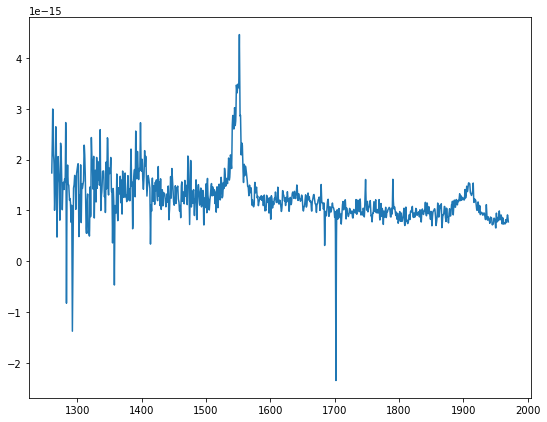

[0.470576] 082024.21+233450.4
1131.6510378361381 2085.991459756251


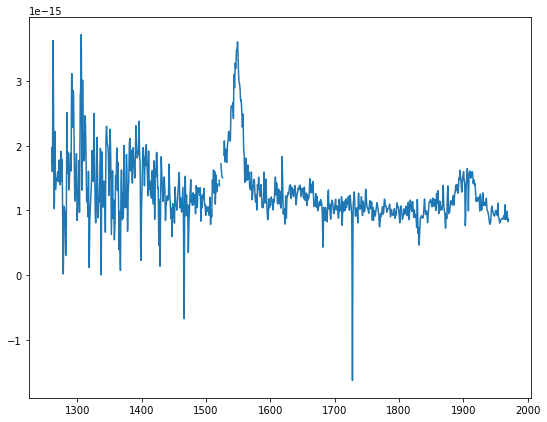

[0.495792] 082658.85+061142.6
1112.573711195751 2051.298176029581


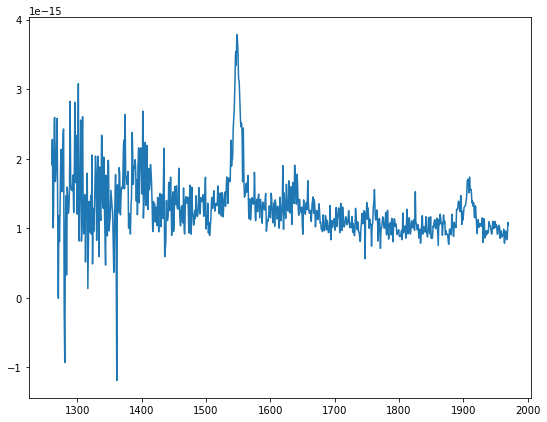

[0.460528] 083332.92+164411.0
1138.9118526796472 2099.858897033728


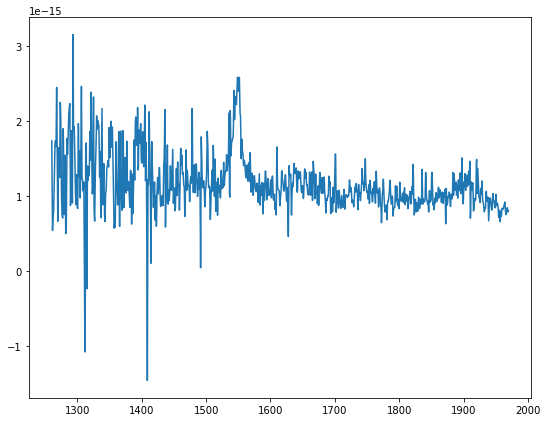

[0.492039] 083510.36+035901.1
1115.1154288777514 2055.984446065088


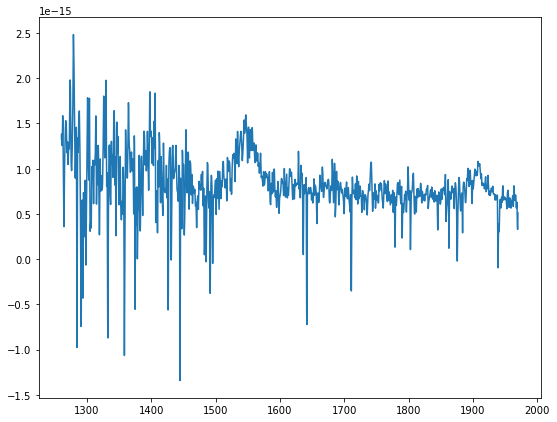

[0.482517] 085116.14+424328.8
1122.2776598091834 2069.1897475189207


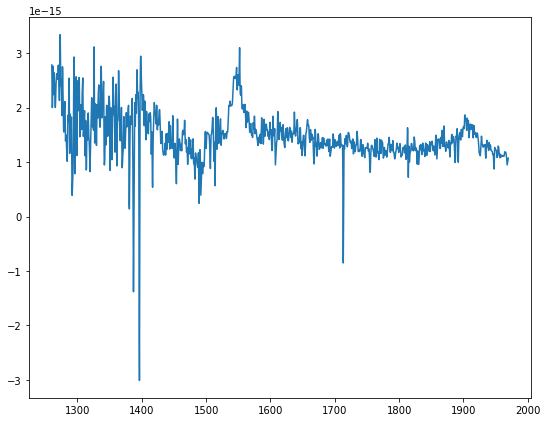

[0.549563] 091451.42+421957.0
1073.7193062736599 1979.6607023544755


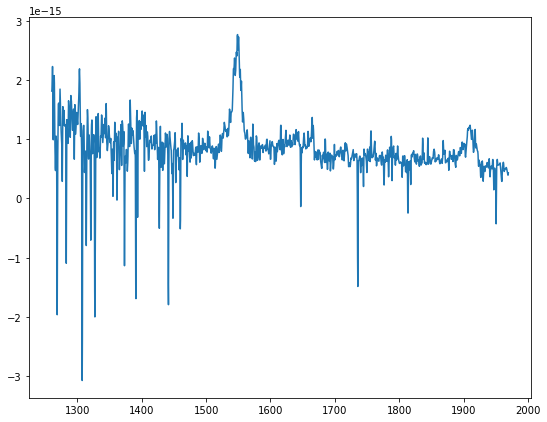

[0.458625] 093502.52+433110.6
1142.7634648302892 2106.4751840068716


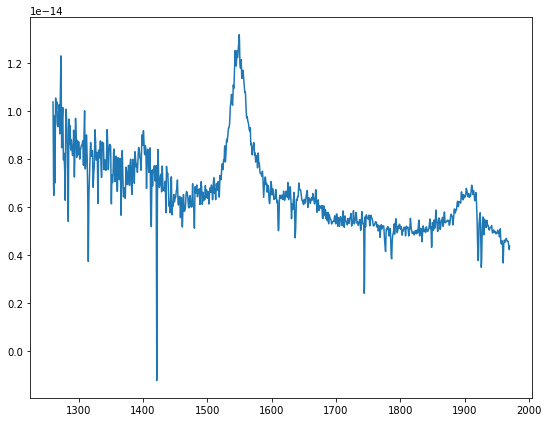

[0.505782] 100054.96+262242.4
1104.6835799408545 2036.750814637761


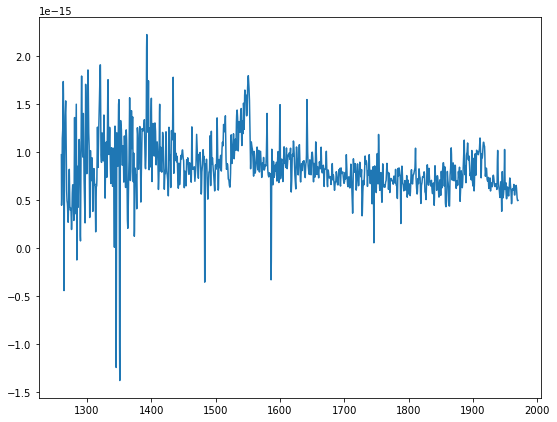

[0.535694] 103320.65+274024.2
1083.6656629620973 1997.5392082814058


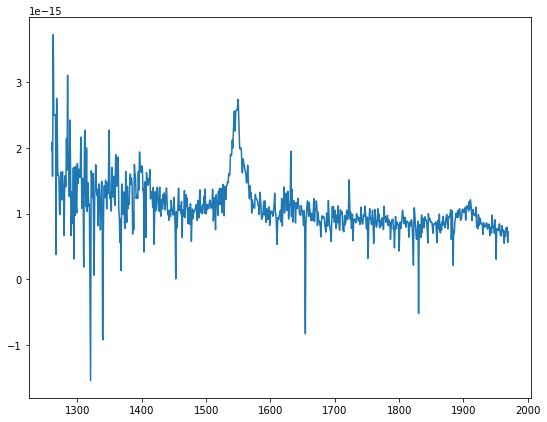

[0.465551] 111138.66+575030.0
1136.0542320230447 2094.107941924728


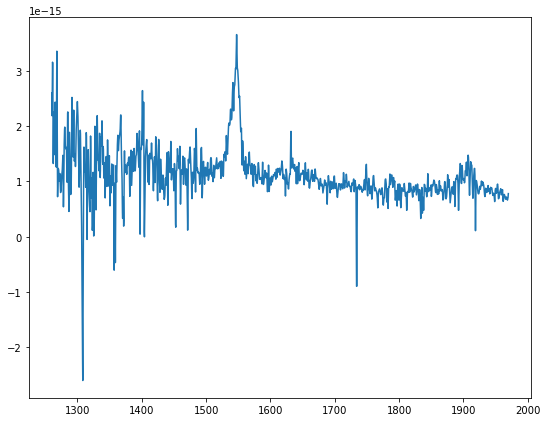

[0.488555] 111941.12+595108.7
1118.2402343746571 2061.271099367937


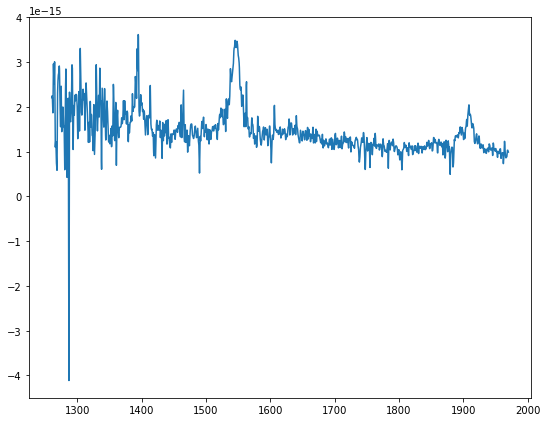

[0.475291] 112224.15+031802.6
1128.2940735621432 2080.282458440898


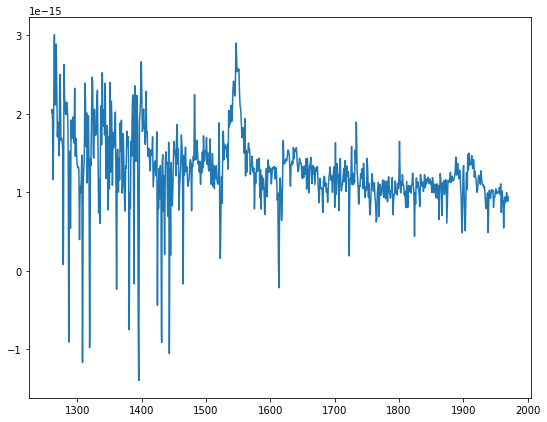

[0.495416] 112614.93+310146.6
1112.597236747053 2050.8692665899503


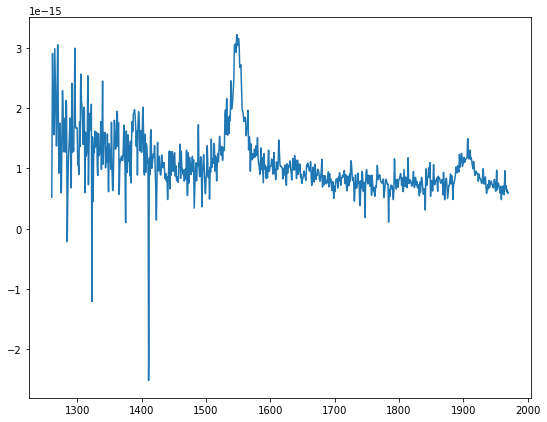

[0.524458] 113327.78+032719.1
1090.898981504321 2010.8725064451462


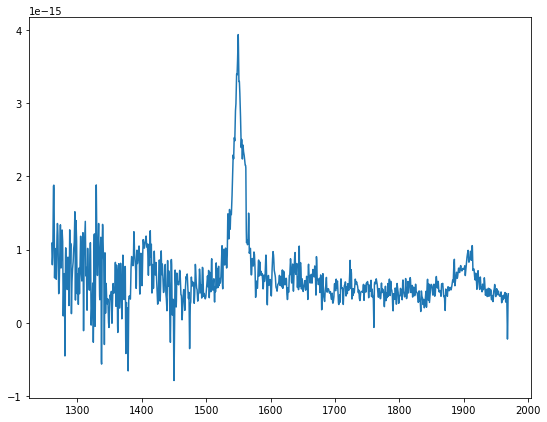

[0.471928] 113923.66+002301.6
1130.6115901164424 2084.555359582561


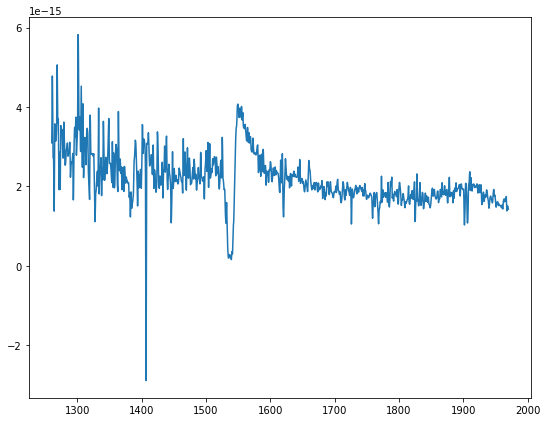

[0.46126] 123734.47+444731.7
1138.6034719265094 2099.290322682143


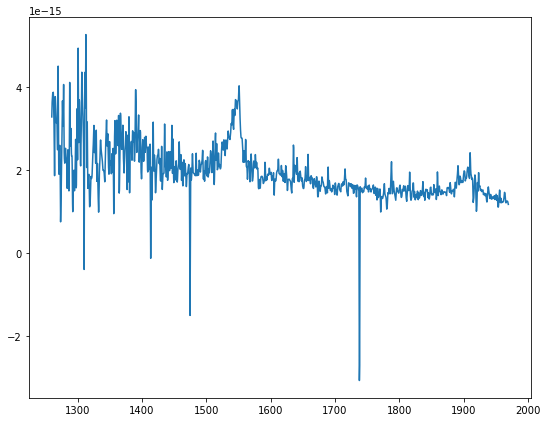

[0.50268] 125415.55+480850.6
1107.473884404475 2041.8954144060226


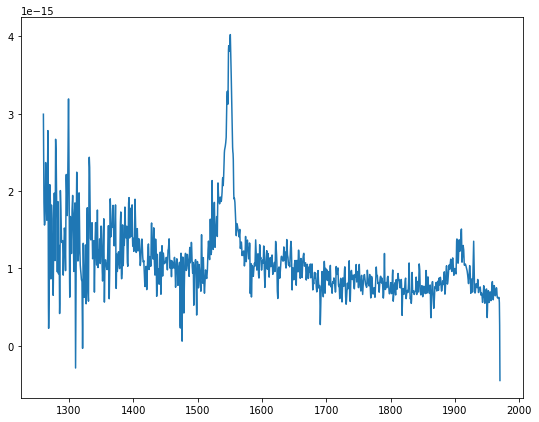

[0.463783] 131627.84+315825.7
1136.6409566085488 2095.671952005528


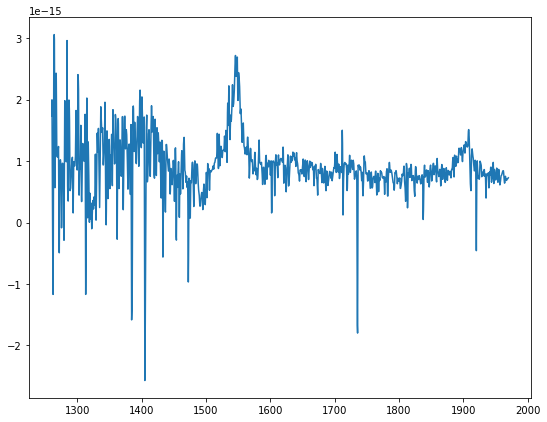

[0.502083] 134701.54+215401.1
1107.658970501185 2042.236665299127


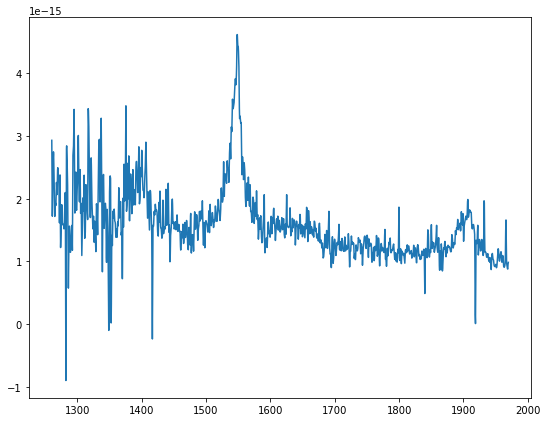

[0.45907] 140331.29+462804.8
1140.5750626199676 2102.441265273433


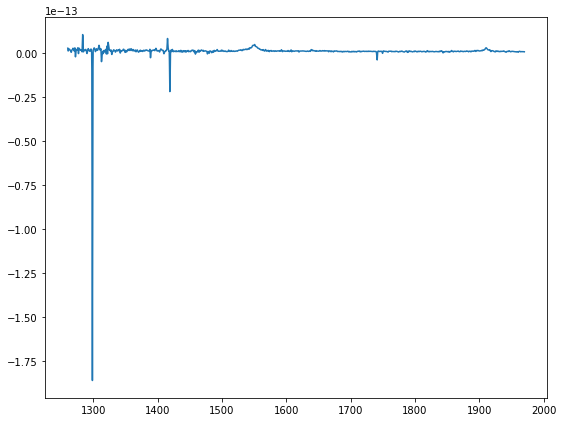

[0.464529] 145334.13+311401.4
1136.5852721793601 2095.0868172085607


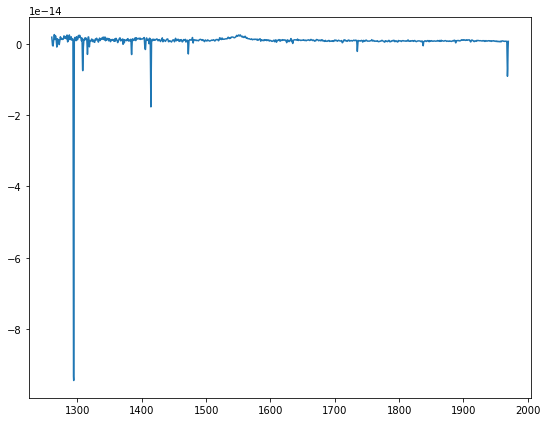

[0.481869] 152654.61+565512.3
1123.0269724361026 2070.5712862065675


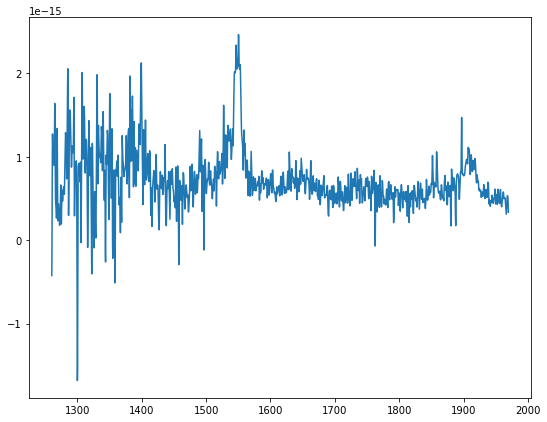

[0.517017] 155837.77+081345.8
1097.0073879309953 2022.5979018822065


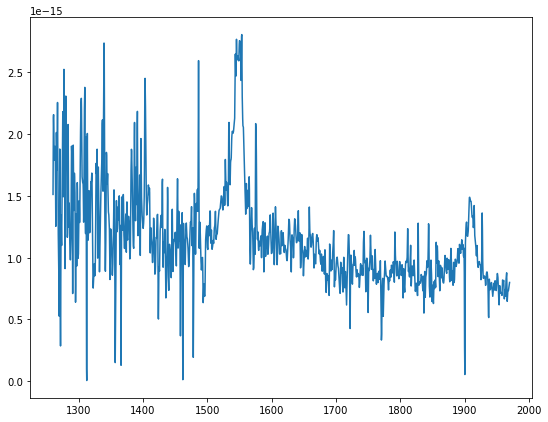

[0.524498] 234145.51-004640.5
1091.1215694415484 2011.7459748500032


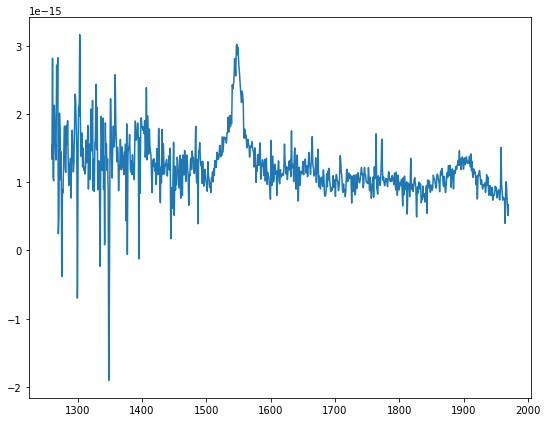

In [6]:
hst = []
wavelist= []
ivar= []
masks   = []

for spec in np.sort([f for f in os.listdir(path) if not f.startswith(".")]):
        z      = dat["Best_z"][dat["Identifier"]==spec[5:23]].values
        print(z, spec[5:23])
        hdul_spec = fits.open(path+spec)
        flux   = hdul_spec[1].data["Flux"]
        wav   = hdul_spec[1].data["Wavelength"] / (1+z)
        err    = hdul_spec[1].data["Flux Errors"]
        specmask   = hdul_spec[1].data["Masks"]
        hdul_spec.close()
        print(min(wav), max(wav))
        wavemask = (wav>=1260)&(wav<=1970)

        fig = plt.figure(figsize=(9,7))
        plt.plot(wav[wavemask], flux[wavemask])
        plt.show()

        #if len(hst)==0:
        hst.append(flux[wavemask][:19411941])#there's a one pixel difference in some hst
        wavelist.append(wav[wavemask][:1941])
        ivar.append(err[wavemask][:1941])
        masks.append(specmask[wavemask][:1941])
        
hst = np.array(hst)
wavelist = np.array(wavelist)
ivar = np.array(ivar)
masks = np.array(masks)

In [7]:
for i in range(len(hst)):
    print(len(hst[i]))

1941
1941
1941
1941
1941
1941
1941
1941
1941
1941
1941
1941
1941
1941
1941
1941
1941
1941
1941
1941
1941
1941
1941
1941
1941


In [8]:
wavelist

array([[1260.13453546, 1260.42472556, 1260.7149825 , ..., 1968.86942183,
        1969.32282296, 1969.77632851],
       [1260.12180337, 1260.41199055, 1260.70224455, ..., 1968.84952887,
        1969.30292542, 1969.75642639],
       [1260.16900592, 1260.45920396, 1260.74946884, ..., 1968.92327944,
        1969.37669298, 1969.83021093],
       ...,
       [1260.05698775, 1260.34716   , 1260.63739907, ..., 1968.74825913,
        1969.20163236, 1969.65511   ],
       [1260.11317523, 1260.40336041, 1260.69361243, ..., 1968.83604801,
        1969.28944146, 1969.74293932],
       [1260.0075315 , 1260.29769236, 1260.58792004, ..., 1968.67098729,
        1969.12434273, 1969.57780257]])

In [9]:
hst.shape

(25, 1941)

---

## ICA fitting

In [10]:
#Use the package that Amy used for determining weights
from lmfit import minimize, Parameters

In [11]:
cmod = pd.read_csv("/Users/trevormccaffrey/Desktop/Research/GTR/Cosmo/ML/ICAcomponents_amy/amy_12603000_10c_180421.comp", sep="\s+", 
                    names=["c1","c2","c3","c4","c5","c6","c7","c8","c9","c10"])

clow = pd.read_csv("/Users/trevormccaffrey/Desktop/Research/GTR/Cosmo/ML/ICAcomponents_amy/amy_12753000_lowew_10c_181101_v1.comp", sep="\s+", 
                    names=["c1","c2","c3","c4","c5","c6","c7","c8","c9","c10"])

chigh = pd.read_csv("/Users/trevormccaffrey/Desktop/Research/GTR/Cosmo/ML/ICAcomponents_amy/amy_12653000_hew_hsn_7c_190302.comp", sep="\s+", 
                    names=["c1","c2","c3","c4","c5","c6","c7"])

chigh.head()

c1         c2        c3        c4        c5        c6        c7
0  0.029352  21.131907  1.849054  6.627145  3.014905 -0.692857  0.047240
1  0.040435  21.345699  1.454935  6.415685  2.845428 -0.676061  0.236393
2  0.050010  21.377104  1.303095  6.243556  2.912823 -0.646095  0.208662
3  0.062440  21.326774  1.182024  6.375846  2.807746 -0.699397  0.145732
4  0.083303  21.481439  0.818819  6.176292  2.792313 -0.817434  0.010118

In [12]:
wave_mod = pd.read_csv("/Users/trevormccaffrey/Desktop/Research/GTR/Cosmo/ML/ICAcomponents_amy/wav_12603000.dat", names=["wave"])
wave_low = pd.read_csv("/Users/trevormccaffrey/Desktop/Research/GTR/Cosmo/ML/ICAcomponents_amy/wav_12753000.dat", names=["wave"])
wave_high= pd.read_csv("/Users/trevormccaffrey/Desktop/Research/GTR/Cosmo/ML/ICAcomponents_amy/wav_12653000.dat", names=["wave"])

In [13]:
modmask = np.array(((wave_mod>1145))).flatten()
lowmask = np.array(((wave_low>1145))).flatten()
highmask= np.array(((wave_high>1145))).flatten()

wave_mod = np.array(wave_mod[modmask]).flatten()
wave_low = np.array(wave_low[lowmask]).flatten()
wave_high= np.array(wave_high[highmask]).flatten()

In [14]:
#make an array of the components to feed to minimize
components_mod = np.array([])
components_low = np.array([])
components_high= np.array([])

for n,i in enumerate(cmod):
    if n==0:
        components_mod = np.append(components_mod, cmod[[i]].values.flatten().astype(float)[modmask])
        components_low = np.append(components_low, clow[[i]].values.flatten().astype(float)[lowmask])
        components_high= np.append(components_high, chigh[[i]].values.flatten().astype(float)[highmask])
    elif n < 7:
        components_mod = np.vstack((components_mod, cmod[[i]].values.flatten().astype(float)[modmask]))
        components_low = np.vstack((components_low, clow[[i]].values.flatten().astype(float)[lowmask]))
        components_high= np.vstack((components_high, chigh[[i]].values.flatten().astype(float)[highmask]))
    else:
        components_mod = np.vstack((components_mod, cmod[[i]].values.flatten().astype(float)[modmask]))
        components_low = np.vstack((components_low, clow[[i]].values.flatten().astype(float)[lowmask]))

In [15]:
def mask(components, wave, spectrum, ivar, flags):
    #The mask is just the pixels that the reconstruction should ignore
    mask = np.zeros(len(spectrum))
    
    #Flag bad pixels from Angelica
    mask[(flags!=0)] = 1

    SiIV  = np.array(((wave>1295) & (wave<1400))).flatten()
    #CIV   = np.array(((wave>1490) & (wave<1546))).flatten()
    AiIII = np.array(((wave>1780) & (wave<1880))).flatten()

    #mask[CIV] = 1
    mask[AiIII] = 1
    mask[SiIV] = 1
    mask = mask!=1

    #Now run ICA on only the unmasked part of the spectrum
    fit = ica_fit(components[:,mask], spectrum[mask], ivar[mask])
    
    weights = []
    for i in fit.params: weights.append(fit.params[i].value)
        
    reconst = np.dot(weights, components)
    sigma   = 1 / np.sqrt(ivar)
    
    n = 3.5
    for i in range(len(spectrum)):
        if (reconst[i] - spectrum[i]) > n*sigma[i]:
            mask[i-5:i+5] = False
            
    return mask

def residual(params, comps, data, eps_data):
    model = sum(params[w].value*comps[n] for (n, w) in enumerate(params))
    return (data-model)**2 #* eps_data

def ica_fit(components, spectrum, ivar):
    params = Parameters()
    for i in range(len(components)):
        params.add('W%d' % (i+1), value=0)
        
    return minimize(residual, params, args=(components, spectrum, ivar), method="lbfgsb", nan_policy='omit')



def ICA_fit(components, wave, spectrum, ivar, flags):
    params = Parameters()
    for i in range(len(components)):
        params.add('W%d' % (i+1), value=0)
        
    MASK = mask(components, wave, spectrum, ivar, flags)
    
    return minimize(residual, params, args=(components[:,MASK], spectrum[MASK], ivar[MASK]), method="lbfgsb", nan_policy='omit')

In [16]:
#Will only do the ICA fits on the part of the spectrum that they cover
ica_mask = (wavelist[0] >= wave_mod.min())

In [17]:
wavelist[0][ica_mask][:len(wave_mod)]

array([1260.13453546, 1260.42472556, 1260.7149825 , ..., 1968.86942183,
       1969.32282296, 1969.77632851])

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


73


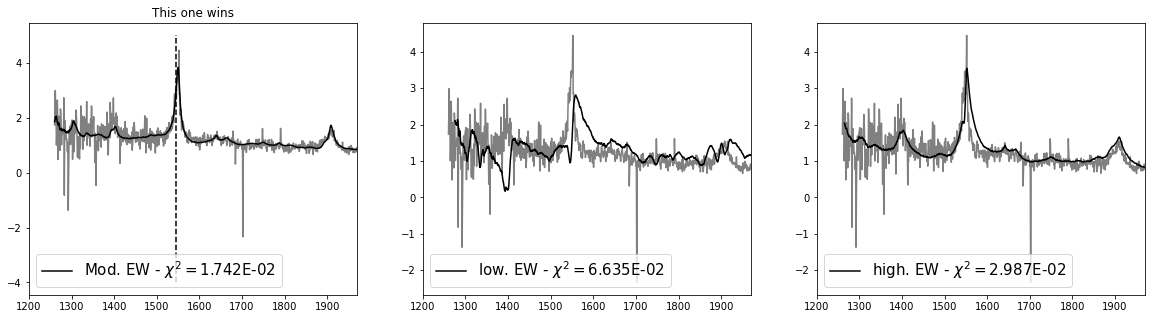

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


114


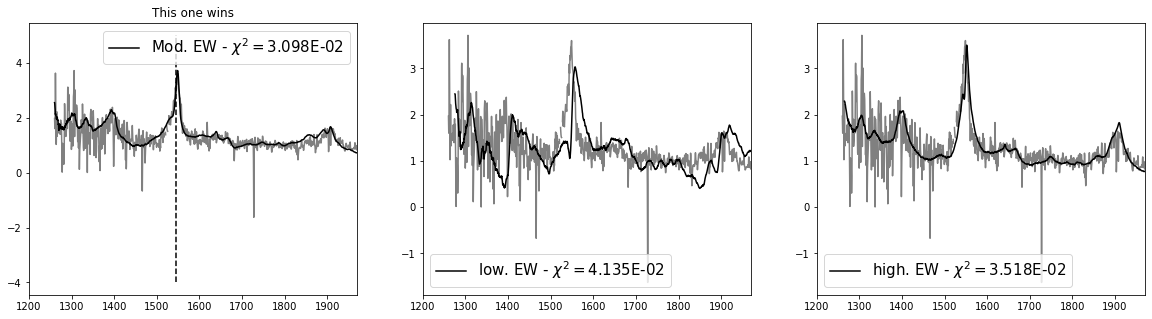

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


284


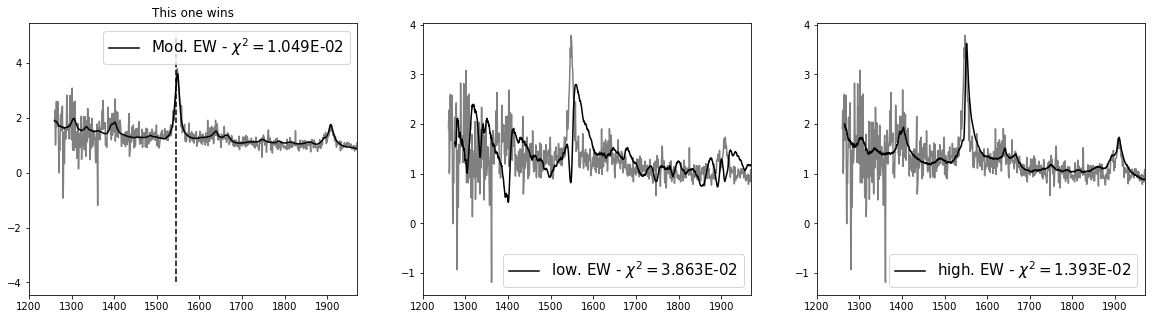

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


142


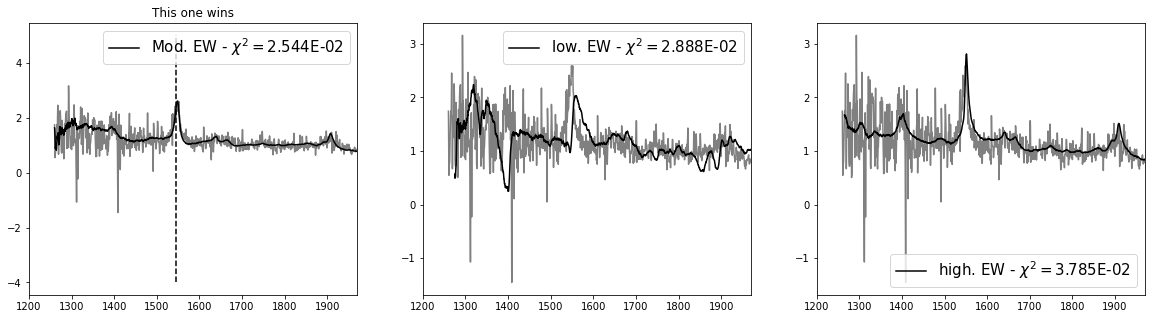

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


270


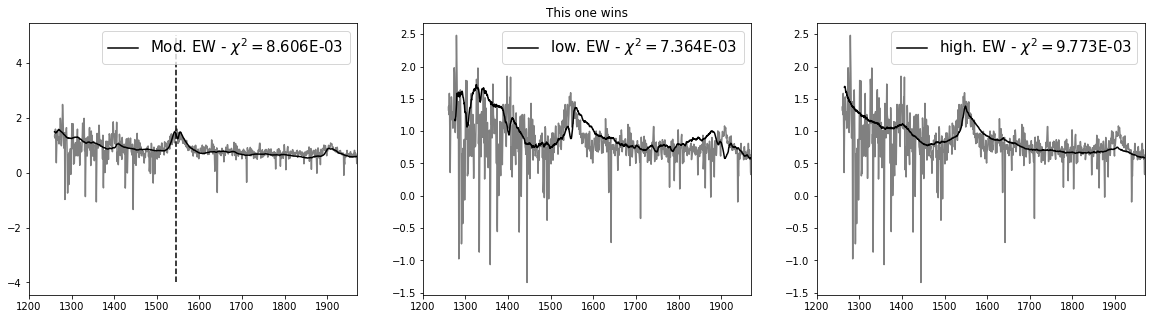

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


88


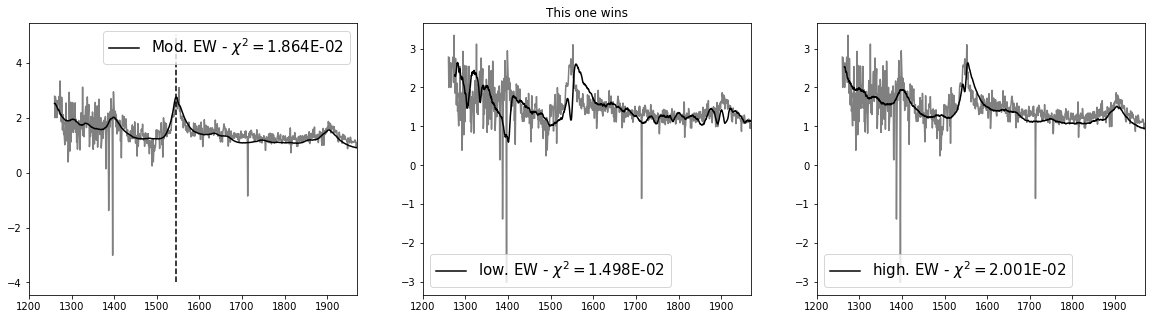

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


220


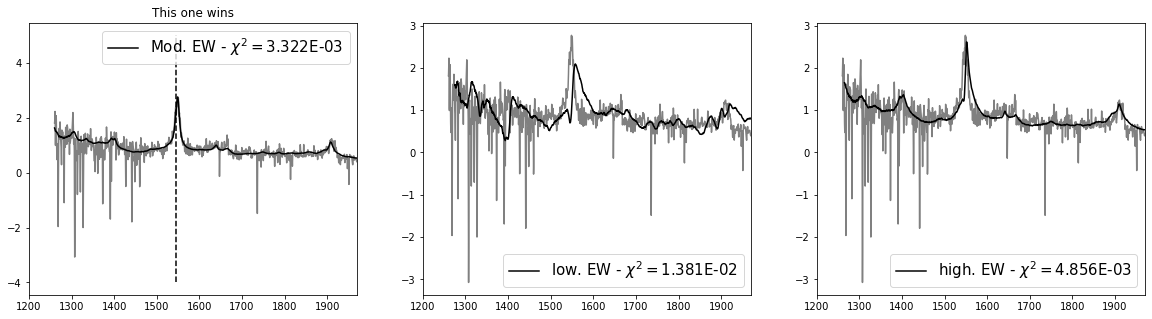

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


28


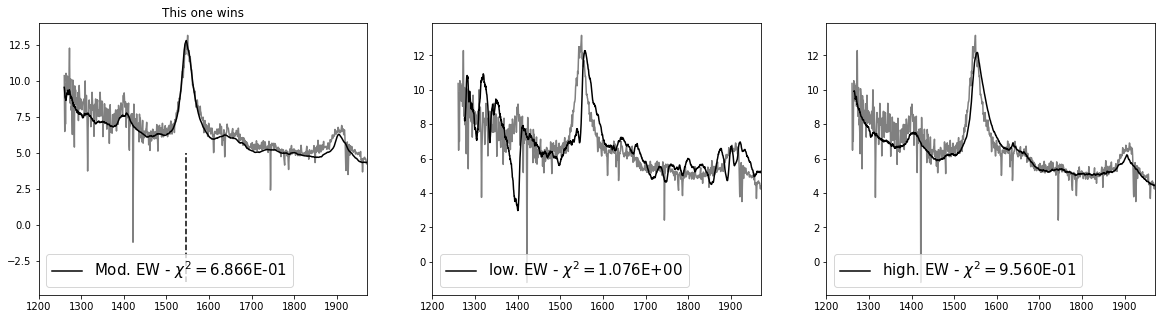

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


151


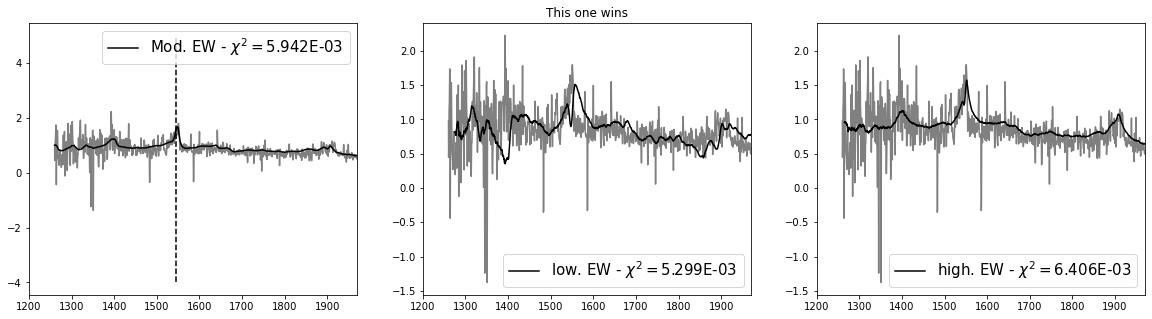

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


143


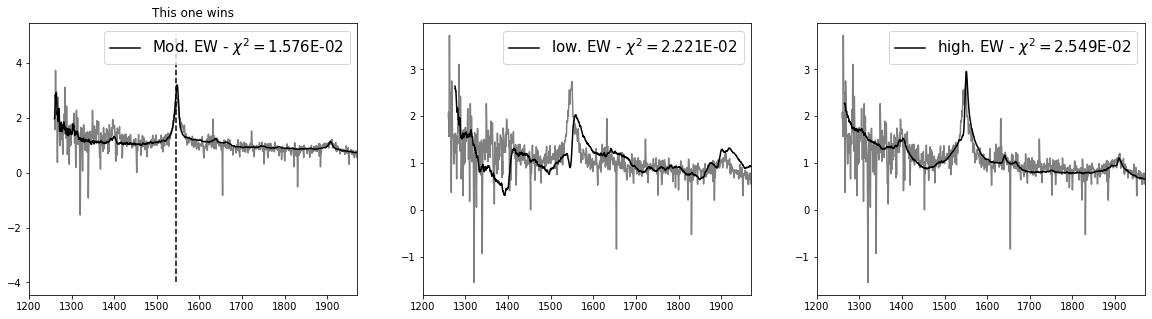

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


183


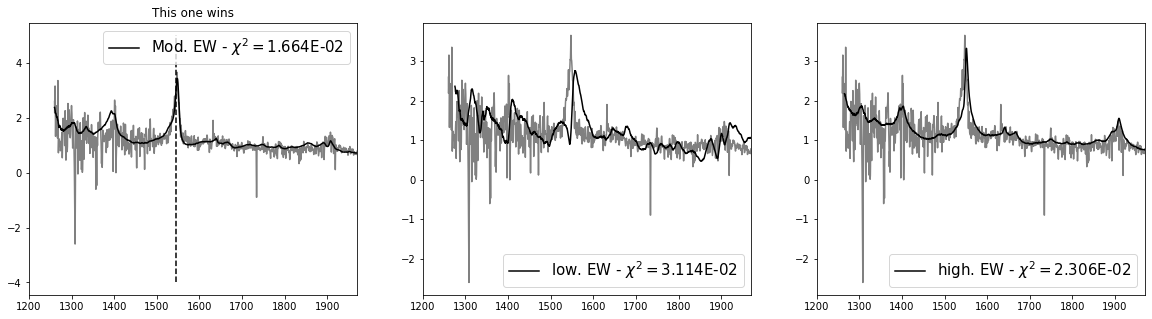

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


230


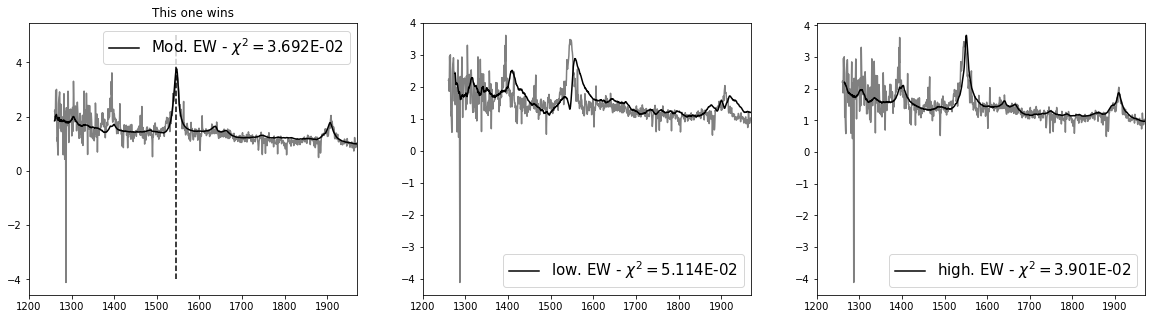

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


292


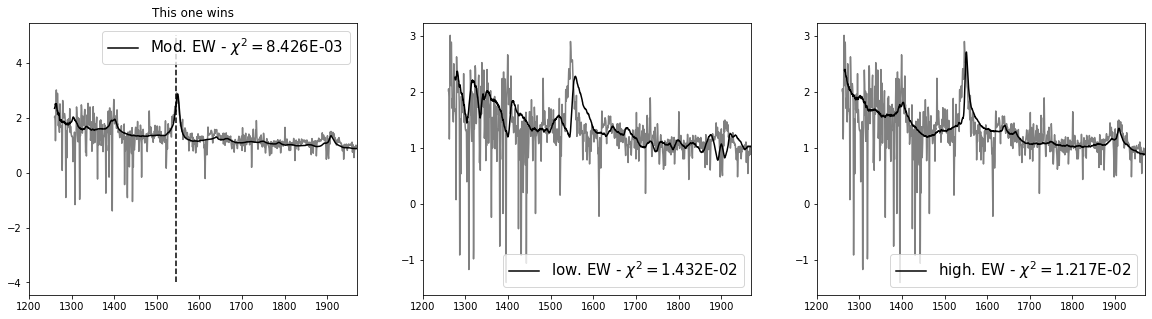

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


82


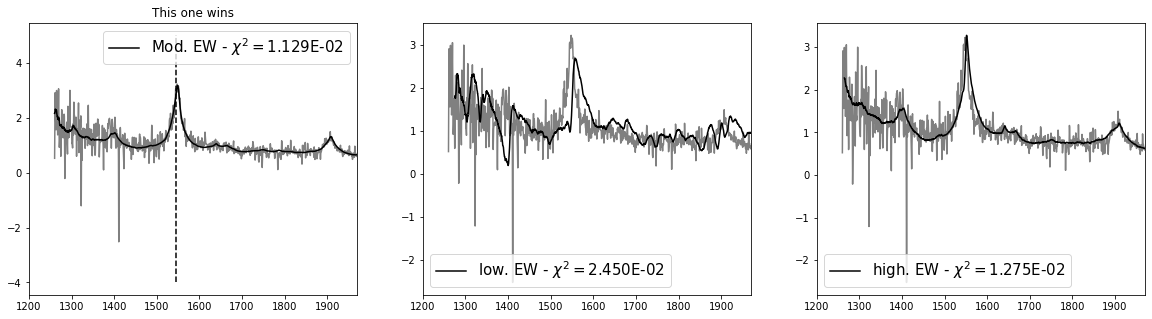

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


288


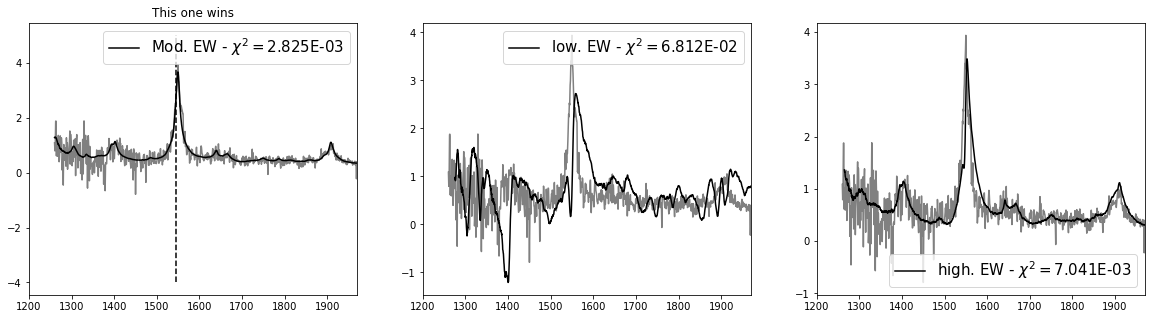

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


133


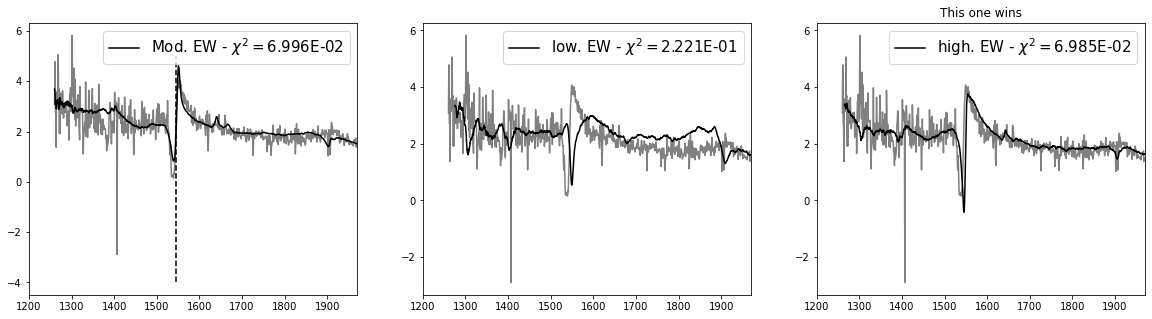

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


211


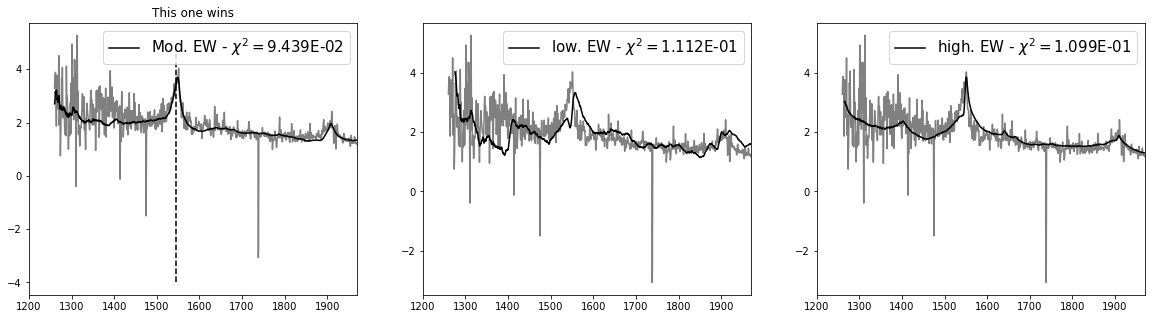

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


95


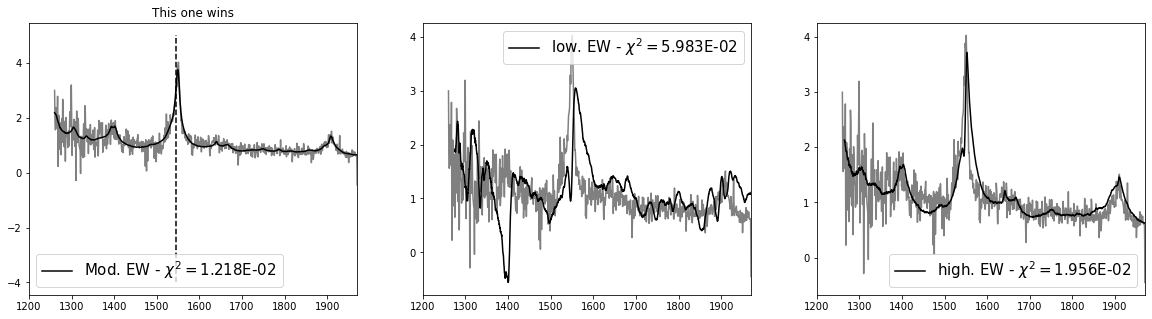

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


367


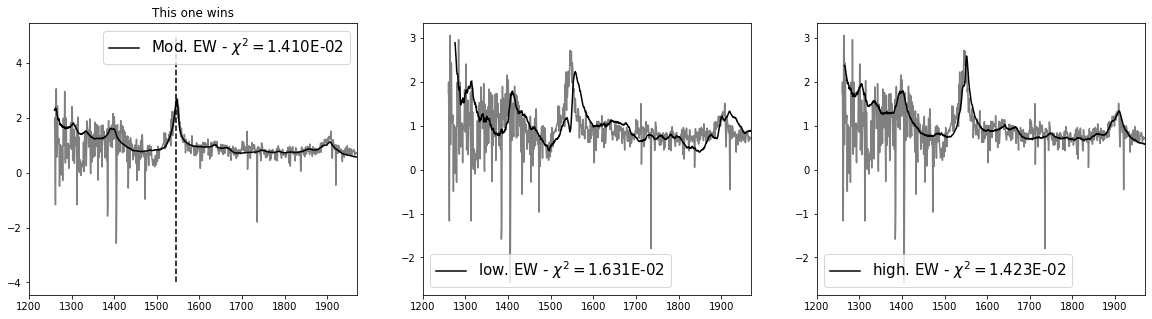

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


55


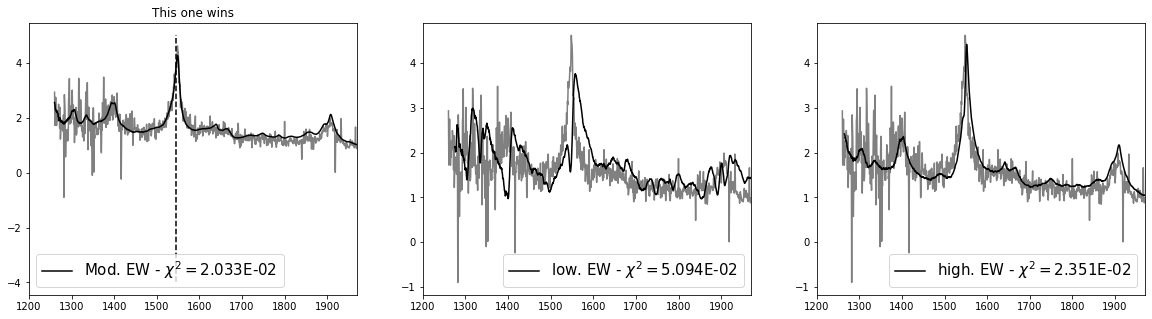

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


215


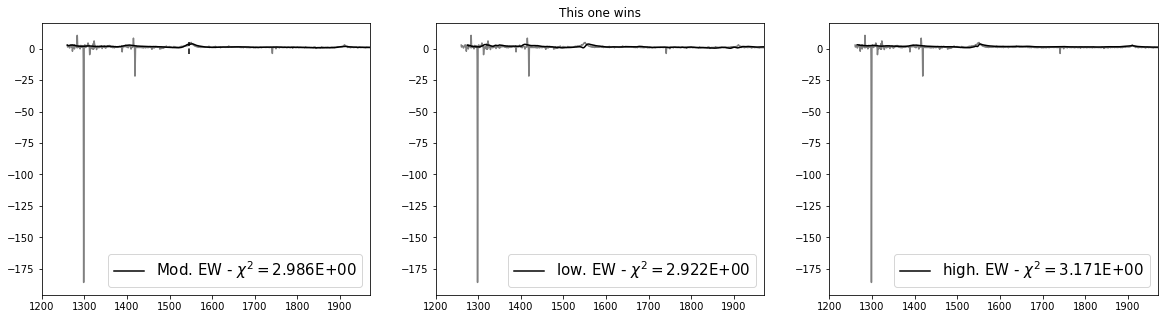

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


165


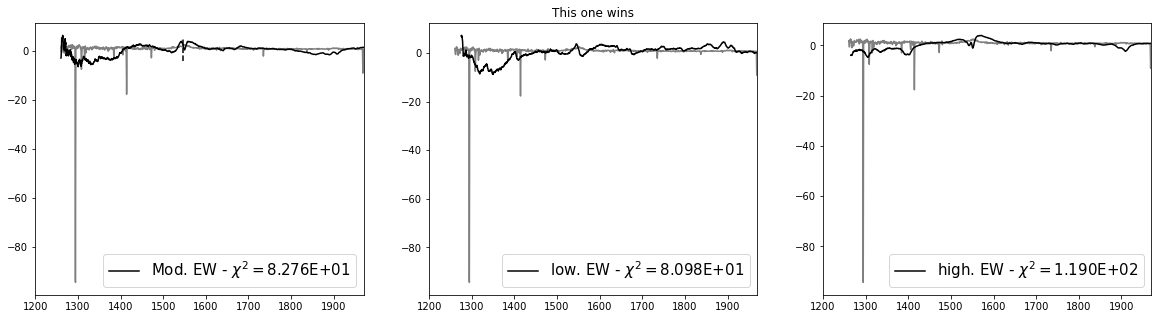

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


313


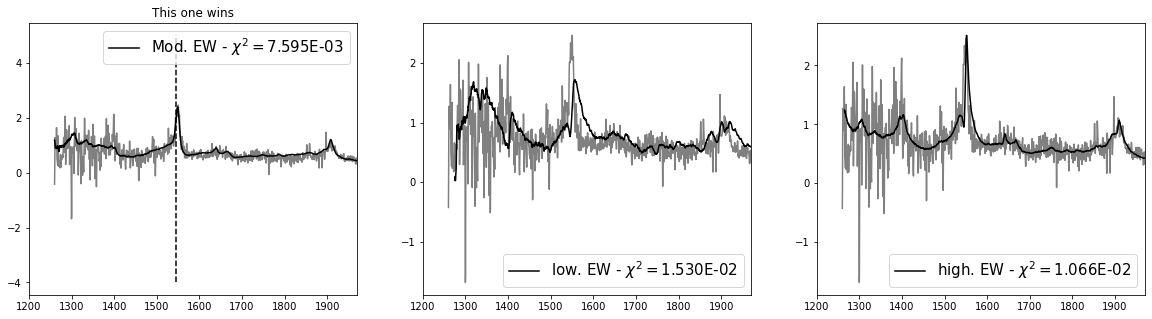

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


138


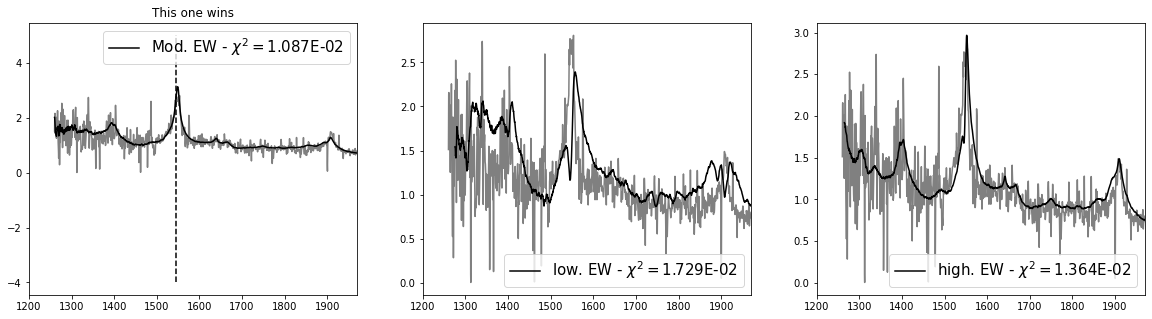

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


153


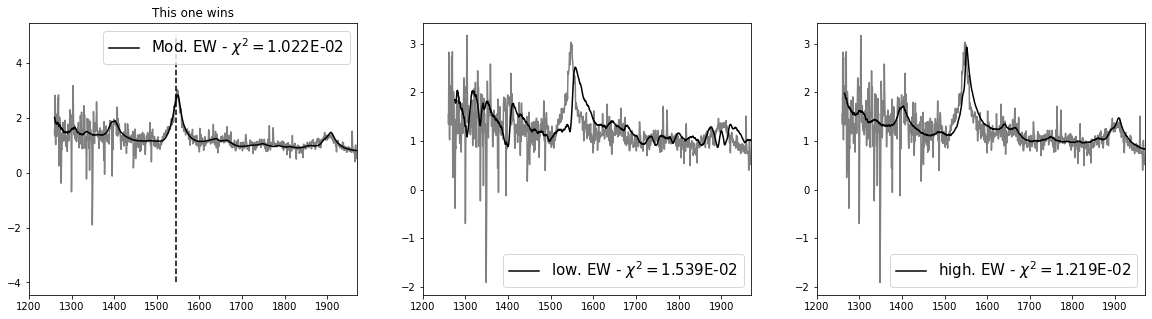

In [18]:
for i in range(len(hst)):
    try:
        fig, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(20,5))

        length = min(len(wave_mod),len(hst[i][ica_mask]))
        fit_mod   = ICA_fit(components_mod[:,:length], wavelist[i][ica_mask][:length], hst[i][ica_mask][:length]*1e15, ivar[i][ica_mask][:length], masks[i][ica_mask][:length])
        weights_mod = []
        for j in fit_mod.params: weights_mod.append(fit_mod.params[j].value)
        mod_chisq = fit_mod.redchi
        ax1.plot(wavelist[i], hst[i]*1e15, '-', c='gray')
        ax1.plot(wave_mod, np.dot(weights_mod, components_mod), '-k', label="Mod. EW - $\chi^2=$%.3E" % (mod_chisq))
        ax1.legend(loc="best", prop={"size":15})
        ax1.set_xlim(1200,1970)
        ax1.plot([1546,1546],[-4,5],"--k")

        length = min(len(wave_low),len(hst[i][ica_mask]))
        fit_low   = ICA_fit(components_low[:,:length], wavelist[i][ica_mask][:length], hst[i][ica_mask][:length]*1e15, ivar[i][ica_mask][:length], masks[i][ica_mask][:length])
        weights_low = []
        for j in fit_low.params: weights_low.append(fit_low.params[j].value)
        low_chisq = fit_low.redchi
        ax2.plot(wavelist[i], hst[i]*1e15, '-', c='gray')
        ax2.plot(wave_low, np.dot(weights_low, components_low), '-k', label="low. EW - $\chi^2=$%.3E" % (low_chisq))
        ax2.legend(loc="best", prop={"size":15})
        ax2.set_xlim(1200,1970)

        length = min(len(wave_high),len(hst[i][ica_mask]))
        fit_high   = ICA_fit(components_high[:,:length], wavelist[i][ica_mask][:length], hst[i][ica_mask][:length]*1e15, ivar[i][ica_mask][:length], masks[i][ica_mask][:length])
        weights_high = []
        for j in fit_high.params: weights_high.append(fit_high.params[j].value)
        high_chisq = fit_high.redchi
        ax3.plot(wavelist[i], hst[i]*1e15, '-', c='gray')
        ax3.plot(wave_high, np.dot(weights_high, components_high), '-k', label="high. EW - $\chi^2=$%.3E" % (high_chisq))
        ax3.legend(loc="best", prop={"size":15})
        ax3.set_xlim(1200,1970)

        if mod_chisq < low_chisq and mod_chisq < high_chisq:
            ax1.set_title("This one wins")
        elif low_chisq < mod_chisq and low_chisq < high_chisq:
            ax2.set_title("This one wins")
            #extent = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
            #fig.savefig('reconst.pdf', bbox_inches=extent.expanded(1.25, 1.25))
        elif high_chisq < low_chisq and high_chisq < mod_chisq:
            ax3.set_title("This one wins")

        print((masks[i][ica_mask][:length]!=0).sum())
        plt.show()
        
    except ValueError:
        print("value error")
        continue

In [19]:
def bestICA(i):
    length = min(len(wave_mod),len(hst[i][ica_mask]))
    fit_mod   = ICA_fit(components_mod[:,:length], wavelist[i][ica_mask][:length], hst[i][ica_mask][:length]*1e15, ivar[i][ica_mask][:length], masks[i][ica_mask][:length])
    mod_chisq = fit_mod.chisqr

    length = min(len(wave_low),len(hst[i][ica_mask]))
    fit_low   = ICA_fit(components_low[:,:length], wavelist[i][ica_mask][:length], hst[i][ica_mask][:length]*1e15, ivar[i][ica_mask][:length], masks[i][ica_mask][:length])
    low_chisq = fit_low.chisqr

    length = min(len(wave_high),len(hst[i][ica_mask]))
    fit_high   = ICA_fit(components_high[:,:length], wavelist[i][ica_mask][:length], hst[i][ica_mask][:length]*1e15, ivar[i][ica_mask][:length], masks[i][ica_mask][:length])
    high_chisq = fit_high.chisqr

    if min(mod_chisq, low_chisq, high_chisq) is low_chisq:
        weights = []
        for j in fit_low.params: weights.append(fit_low.params[j].value)
        return wave_low, np.dot(weights, components_low)
    elif min(mod_chisq, low_chisq, high_chisq) is high_chisq:
        weights = []
        for j in fit_high.params: weights.append(fit_high.params[j].value)
        return wave_high, np.dot(weights, components_high)
    else:
        weights = []
        for j in fit_mod.params: weights.append(fit_mod.params[j].value)
        return wave_mod, np.dot(weights, components_mod)

In [20]:
components_mod.shape

(10, 3768)

---

## Autoencoder

Need training data that covers wavelength range of all of these spectra.  The largest common wavelength range for the HST spectra is 1170-1940Å

DR14 covers 3610-10140 Å, so we can use the following redshift range for training data:

$$ z_\mathrm{min} = 3610/1170 - 1 = 2.085 $$ and

$$ z_\mathrm{max} = 10140/1940 - 1 = 4.227 $$

... which gives how many spectra?

In [21]:
tab = Table.read("/Users/trevormccaffrey/Desktop/Research/GTR/VLA2018b/DR14/DR14Q_v4_4.fits", format="fits")
dr14 = tab.to_pandas()
dr14.head()

SDSS_NAME        RA        DEC   THING_ID  PLATE    MJD  \
0  b'000000.45+174625.4'  0.001898  17.773739  268270422   7596  56945   
1  b'000000.57+055630.8'  0.002375   5.941903  163544156   8740  57367   
2  b'000000.66+145828.8'  0.002756  14.974675  244864389   6177  56268   
3  b'000000.97+044947.2'  0.004052   4.829781  154078229   4415  55831   
4  b'000001.20+240354.5'  0.005026  24.065163  319918739   7666  57339   

   FIBERID  SPECTRO        Z  Z_ERR  ...         JFLUX     JFLUX_ERR  \
0      162  b'BOSS'  2.30900    0.0  ...  0.000000e+00  0.000000e+00   
1      694  b'BOSS'  2.10312    0.0  ...  1.229889e-31  4.504542e-32   
2      595  b'BOSS'  2.49700    0.0  ...  2.310948e-31  4.565332e-32   
3      464  b'BOSS'  1.61900    0.0  ...  6.597500e-31  4.154652e-32   
4      121  b'BOSS'  1.61621    0.0  ...  0.000000e+00  0.000000e+00   

          HFLUX     HFLUX_ERR         KFLUX     KFLUX_ERR  FIRST_MATCHED  \
0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00             -1   
1  1.496425e-31  4.729050e-32  2.459819e-31  5.689572e-32              0   
2  2.355314e-31  5.970480e-32  2.427149e-31  6.521724e-32              0   
3  9.038160e-31  4.420332e-32  8.567425e-31  5.178768e-32              0   
4  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00             -1   

   FIRST_FLUX  FIRST_SNR  SDSS2FIRST_SEP  
0        -1.0       -1.0            -1.0  
1        -1.0       -1.0            -1.0  
2        -1.0       -1.0            -1.0  
3        -1.0       -1.0            -1.0  
4        -1.0       -1.0            -1.0  

[5 rows x 96 columns]

In [22]:
(dr14["BI_CIV"]!=0).sum()

21877

In [23]:
((dr14["Z"]>2.085)&(dr14["Z"]<4.227)).sum()

214571

Apparently quite a lot.  Save the first 50,000.

In [24]:
((dr14["Z"]>2.09)&(dr14["Z"]<2.28)).sum()

50620

In [25]:
! ls ../data

10c_flux_weight_data                   LOFAR_spectra
DR14_zmin039_zmax068.csv               RebinnedHSTData
DR14_zmin2085_zmax4227.csv             VLAspectra_all8403
DR14_zmin209_zmax228.csv               grdr7.8403col.radec.platemjdfiber.csv
HST_Chandra_Redshifts.csv              s7_flux_weight_data
HST_Reconstructions                    speclist_8403_VLA_colselected.txt
HST_SDSS_Data                          speclist_LOFAR.txt
HST_train                              total_flux_weight_data
LOFAR_from8403colorselected_all388.csv


dr14[((dr14["Z"]>2.09)&(dr14["Z"]<2.28))].to_csv("../data/DR14_zmin209_zmax228.csv")

Save the file formats in a text file.  Then can use to query SDSS database.

! awk -F "," 'NR>1 {printf "%04d/spec-%04d-%05d-%04d.fits\n", $6,$6,$7,$8}' \
../data/DR14_zmin209_zmax228.csv > ../data/HST_train/spec_list_dr14_zmin209_zmax228.txt

Run this command to save the text file:

`` awk -F "," 'NR>1 {printf "%04d/spec-%04d-%05d-%04d.fits\n", $6,$6,$7,$8}' \
../data/DR14_zmin209_zmax228.csv > ../data/HST_train/spec_list_dr14_zmin209_zmax228.txt ``

And this one to ask SDSS for the spectra; it will create a directory called "lite/" containing the spectra inside your current working directory: 

`` wget -nv -r -nH --cut-dirs=7 \
-i spec_list_dr14_zmin209_zmax228.txt \
-B https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/``

Note that the above URL doesn't actually have all the SDSS spectra and will return a not found error for those.  Some with lower plate numbers won't show up.  I think this is because some of just saved from earlier SDSS projects?  If you want all spectra, run the command above first, then run it again but swap the current URL for this one: https://data.sdss.org/sas/dr16/sdss/spectro/redux/26/spectra/lite/.  The second command will run a lot slower, but you should recover pretty much all of the missed spectra.

Final stats for the wget query:

``
FINISHED --2021-06-04 12:42:06--
Total wall clock time: 1h 56m 25s
Downloaded: 48750 files, 9.9G in 34m 53s (4.86 MB/s)
``

So you could get most of the 50620-48750=1870 "missing" spectra by swapping URLs above.  But that's not really worth my trouble right now.

----

Load in the training data

In [26]:
dr14_sub = pd.read_csv("../data/DR14_zmin209_zmax228.csv")
dr14_sub.head()

Unnamed: 0              SDSS_NAME        RA        DEC   THING_ID  PLATE  \
0           1  b'000000.57+055630.8'  0.002375   5.941903  163544156   8740   
1           9  b'000001.55-003332.6'  0.006464  -0.559066   85757473   7850   
2          12  b'000001.64+003459.4'  0.006855   0.583184  107544612   7848   
3          15  b'000001.93-001427.4'  0.008067  -0.240971   87711992   4216   
4          23  b'000002.46+214939.3'  0.010286  21.827593  302509815   7595   

     MJD  FIBERID  SPECTRO         Z  ...         JFLUX     JFLUX_ERR  \
0  57367      694  b'BOSS'  2.103120  ...  1.229889e-31  4.504542e-32   
1  56956      711  b'BOSS'  2.219141  ...  0.000000e+00  0.000000e+00   
2  56959      928  b'BOSS'  2.271102  ...  0.000000e+00  0.000000e+00   
3  55477      312  b'BOSS'  2.163000  ...  3.333770e-31  3.747827e-32   
4  56957      764  b'BOSS'  2.105861  ...  0.000000e+00  0.000000e+00   

          HFLUX     HFLUX_ERR         KFLUX     KFLUX_ERR  FIRST_MATCHED  \
0  1.496425e-31  4.729050e-32  2.459819e-31  5.689572e-32              0   
1  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00              0   
2  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00              0   
3  3.429379e-31  7.670890e-32  4.916812e-31  6.641088e-32              0   
4  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00             -1   

   FIRST_FLUX  FIRST_SNR  SDSS2FIRST_SEP  
0        -1.0       -1.0            -1.0  
1        -1.0       -1.0            -1.0  
2        -1.0       -1.0            -1.0  
3        -1.0       -1.0            -1.0  
4        -1.0       -1.0            -1.0  

[5 rows x 97 columns]

In [27]:
z     = dr14_sub[["Z"]].values.flatten()
plate = dr14_sub[["PLATE"]].values.flatten()
mjd   = dr14_sub[["MJD"]].values.flatten()
fiber = dr14_sub[["FIBERID"]].values.flatten()
BAL   = dr14_sub[["BI_CIV"]].values.flatten()!=0

In [28]:
BAL.sum()

3557

(-3.0, 8.0)

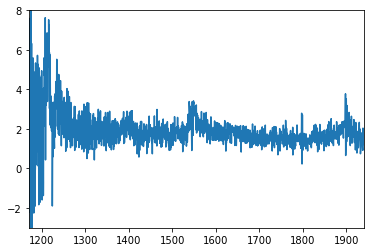

In [29]:
#Load in data from each FITS file
hdul_spec = fits.open("../data/HST_train/lite_highz/8740/spec-8740-57367-0694.fits")
sdss_flux   = hdul_spec[1].data["flux"]
sdss_loglam = hdul_spec[1].data["loglam"]
sdss_wave   = 10.**(sdss_loglam)  / (1+2.103120) #x-axis: wavelength
sdss_ivar   = hdul_spec[1].data["ivar"]

plt.plot(sdss_wave, sdss_flux)
plt.xlim(1170,1940)
plt.ylim(-3,8)

In [30]:
((sdss_wave>1260) & (sdss_wave<1940)).sum()

1875

So rebinning worked well.  Although there are only 2194 pixels in some of the HST spectra, so just save the first 2194 for the retrieved SDSS spectra as well.

Load in the SDSS data

In [32]:
spec_path = "../data/HST_train/lite_highz/"

spectra = [] #python list **way** faster than np.append - convert to array at end
wave    = []
N = 0

for red, pl, mj, fib, bal in zip(z, plate, mjd, fiber, BAL):
    try:
        hdul_spec = fits.open(spec_path+"%04d/spec-%04d-%05d-%04d.fits" % (pl,pl,mj,fib))
    except FileNotFoundError:
        #print(spec_path+"%04d/spec-%04d-%05d-%04d.fits NOT FOUND" % (pl,pl,mj,fib))
        continue
        
    #Load in data from each FITS file
    sdss_flux   = hdul_spec[1].data["flux"]
    sdss_loglam = hdul_spec[1].data["loglam"]
    sdss_wave   = 10.**(sdss_loglam) / (1+red)  #x-axis: wavelength
    
    #Want the same wavelength range for each array
    wavemask   = ((sdss_wave>1260) & (sdss_wave<1970))
    sdss_flux  = sdss_flux[wavemask]
    #sdss_flux /= np.median(sdss_flux) #normalize spectrum
    sdss_wave  = sdss_wave[wavemask]
    hdul_spec.close()
    
    if len(sdss_flux) >= 1941 and ~bal: #train on non-BALs in hope that this will prevent it from modeling troughs
        spectra.append(sdss_flux[:1941]) #Some might have one extra pixel
        wave.append(sdss_wave[:1941])
            
    N+=1
    if N%5000==0: print(N)
        
spectra = np.array(spectra)
wave = np.array(wave)

5000
10000
15000
20000
25000
30000
35000
40000
45000


In [33]:
wave.shape, spectra.shape

((43967, 1941), (43967, 1941))

---

Build autoencoder.  See, e.g., Chapters 11 and 17 of Geron, "Hands-on Machine Learning with Sci-kit Learn, Keras, and Tensorflow"

In [34]:
import tensorflow.keras.backend as K

In [35]:
n_latent = 10
MASKK= (~((wave[0]>1490)&(wave[0]<1546))).astype(int) #Mask CIV absorption
MASK = K.variable(MASKK)

#Build the encoder - the dimension of the final layer is the dimension of the latent space
stacked_encoder = keras.models.Sequential([
    keras.layers.Input(shape=spectra[0].shape),
    keras.layers.Lambda(lambda x: x*MASK), #this layer is the mask - turn off corresponding neurons
    keras.layers.Dropout(0.2),
    #keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.PReLU(),
    keras.layers.Dense(200, kernel_initializer="he_normal"),
    #keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.PReLU(),
    keras.layers.Dense(50, kernel_initializer="he_normal"),
    #keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.PReLU(),
    keras.layers.Dense(n_latent, kernel_initializer="he_normal")
])

#Build the decoder - given values in latent space, it will reconstruct the original spectrum
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(50, kernel_initializer="he_normal", input_shape=[n_latent]),
    #keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.PReLU(),
    keras.layers.Dense(200, kernel_initializer="he_normal"),
    #keras.layers.LeakyReLU(alpha=0.3),
    keras.layers.PReLU(),
    keras.layers.Dense(spectra[0].shape[0]) #no activation function since we want actual pixel values
])

#Now put them together
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])

In [42]:
stacked_ae.compile(loss="logcosh", optimizer=keras.optimizers.Nadam(lr=3e-5))

In [43]:
X_train = spectra[:28000]
X_valid = spectra[28000:40000]
X_test  = spectra[40000:]

history = stacked_ae.fit(X_train, X_train, epochs=15,
                         validation_data=[X_valid, X_valid])

Train on 28000 samples, validate on 12000 samples
Epoch 1/15
28000/28000 [==============================] - 42s 2ms/sample - loss: 0.1242 - val_loss: 0.1244
Epoch 2/15
28000/28000 [==============================] - 46s 2ms/sample - loss: 0.1240 - val_loss: 0.1244
Epoch 3/15
28000/28000 [==============================] - 48s 2ms/sample - loss: 0.1242 - val_loss: 0.1226
Epoch 4/15
28000/28000 [==============================] - 46s 2ms/sample - loss: 0.1242 - val_loss: 0.1232
Epoch 5/15
28000/28000 [==============================] - 47s 2ms/sample - loss: 0.1242 - val_loss: 0.1232
Epoch 6/15
28000/28000 [==============================] - 40s 1ms/sample - loss: 0.1239 - val_loss: 0.1227
Epoch 7/15
28000/28000 [==============================] - 47s 2ms/sample - loss: 0.1240 - val_loss: 0.1233
Epoch 8/15
28000/28000 [==============================] - 46s 2ms/sample - loss: 0.1239 - val_loss: 0.1228
Epoch 9/15
28000/28000 [==============================] - 46s 2ms/sample - loss: 0.1239 - val_

In [44]:
test_num = 201
reconst = stacked_ae.predict(np.array([X_test[test_num]]))

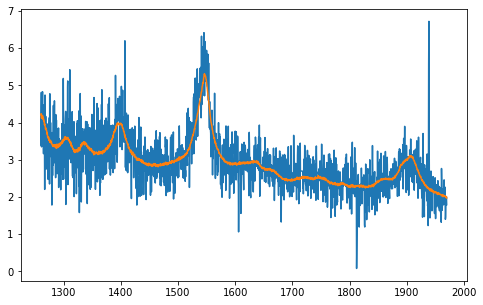

In [45]:
fig = plt.figure(figsize=(8,5))

#plt.plot(wave[800], spectra[800])
plt.plot(wave[40000+test_num], X_test[test_num])
plt.plot(wave[40000+test_num], reconst[0])
plt.show()

In [46]:
n_spectra = 30
reconst = stacked_ae.predict(np.array(X_test[:n_spectra]))

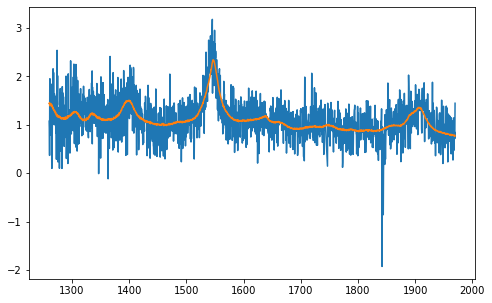

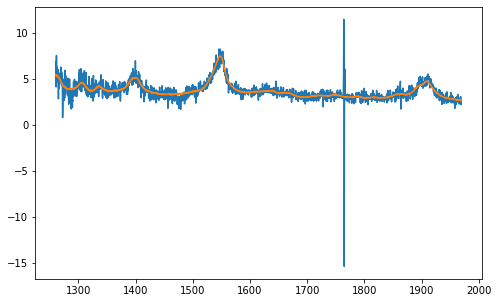

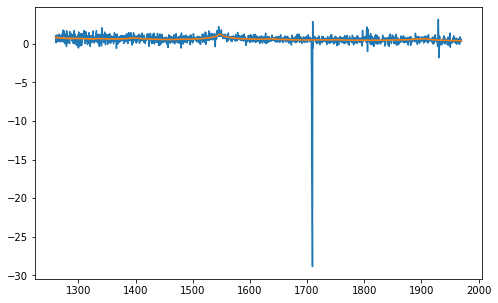

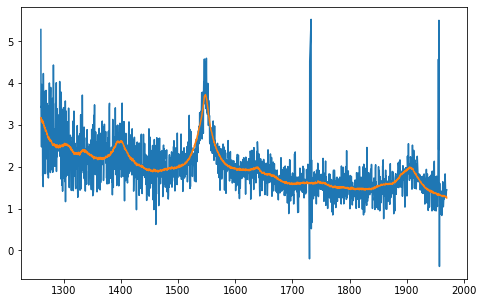

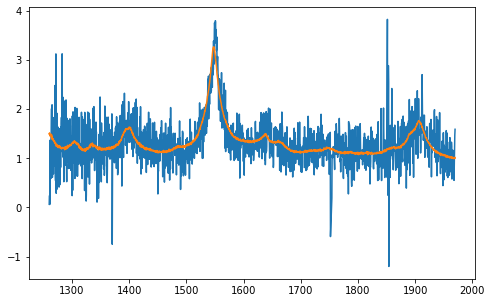

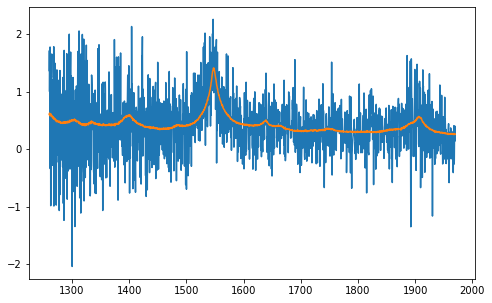

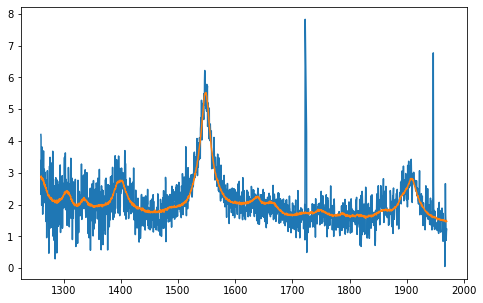

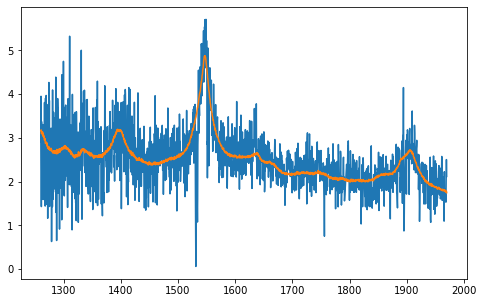

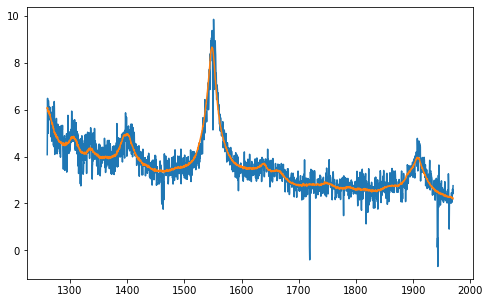

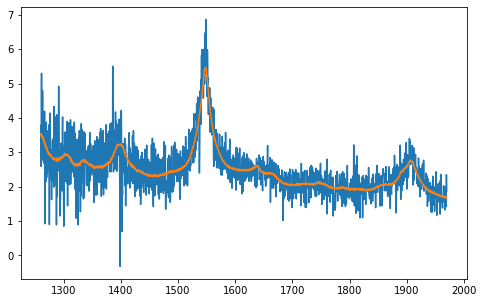

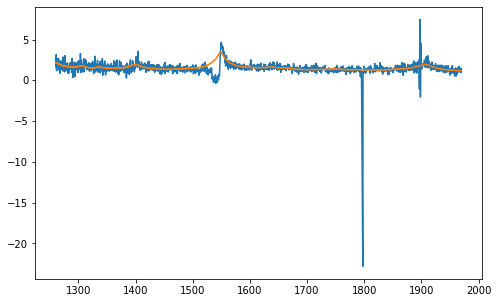

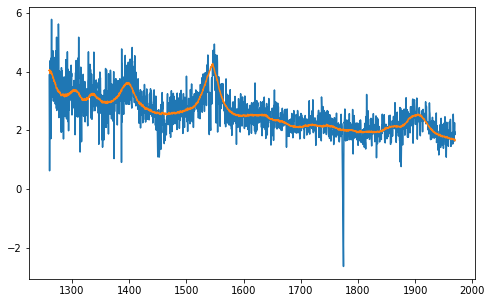

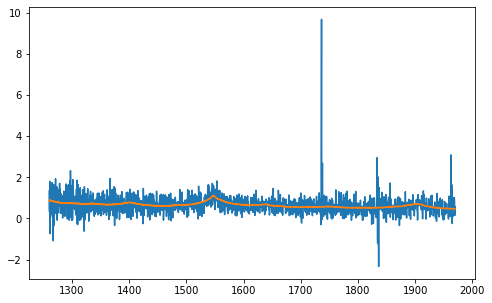

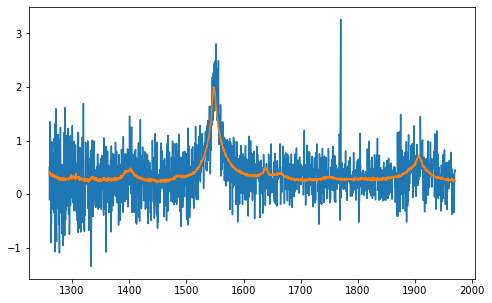

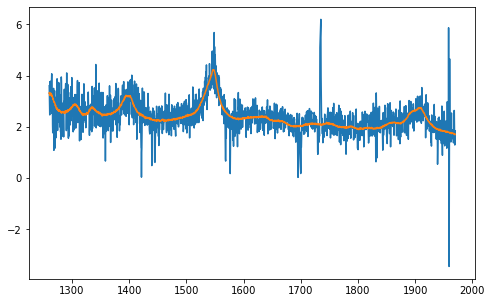

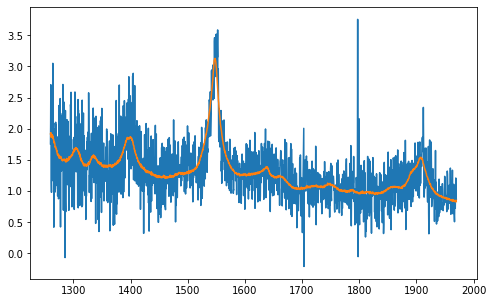

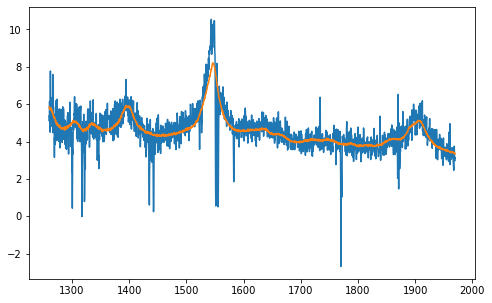

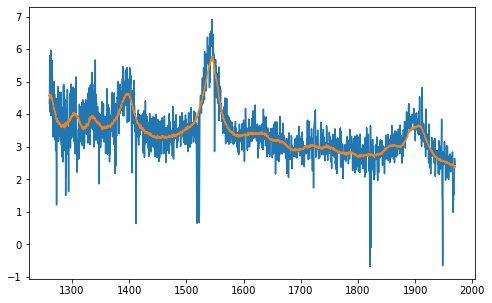

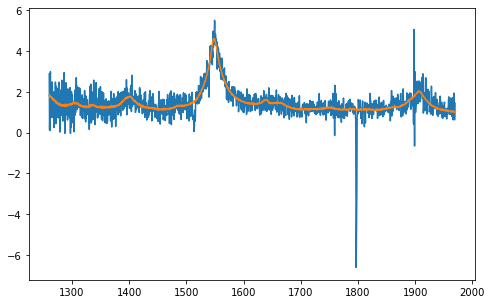

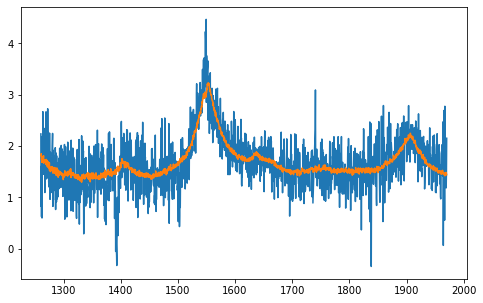

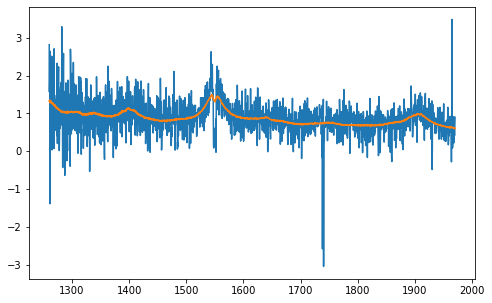

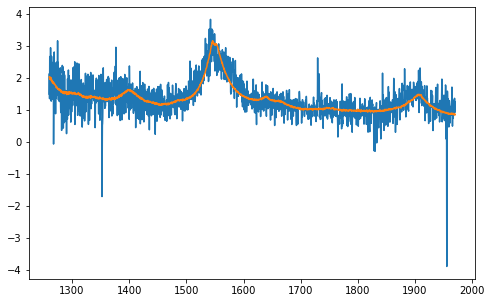

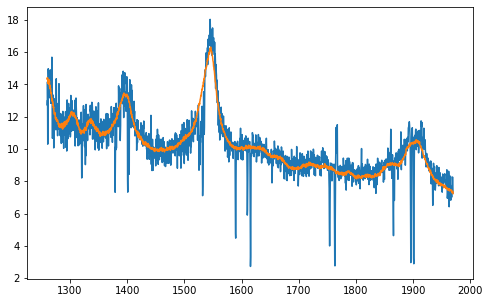

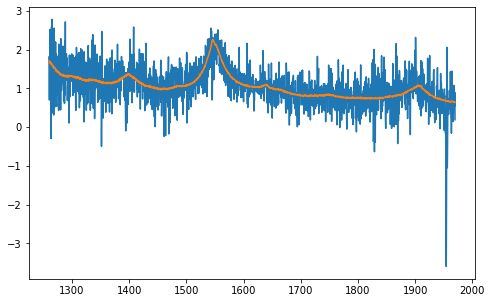

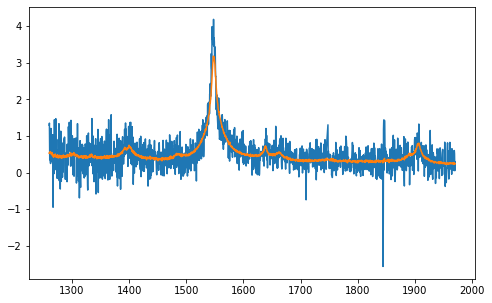

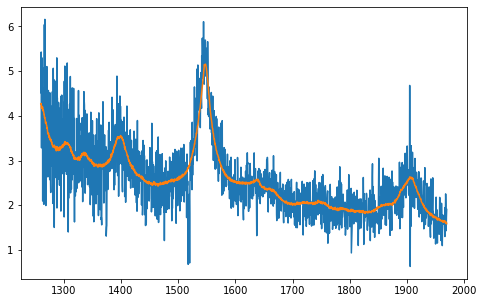

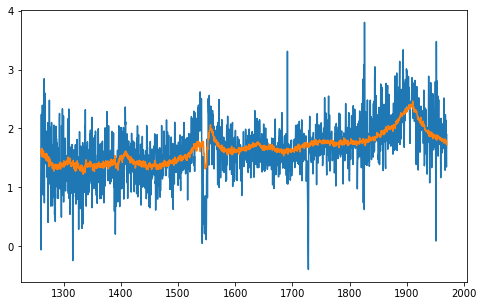

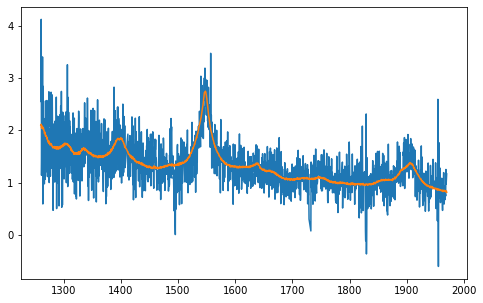

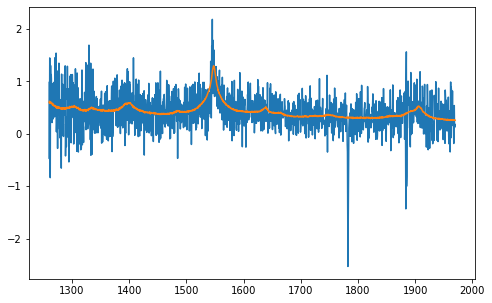

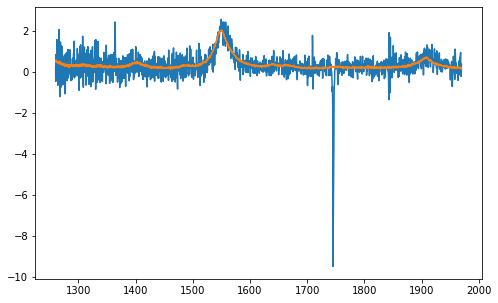

In [47]:
for i in range(n_spectra):
    #reconst = stacked_ae.predict(np.array([X_valid[i]]))
    fig = plt.figure(figsize=(8,5))
    plt.plot(wave[40000+i], X_test[i])
    plt.plot(wave[40000+i], reconst[i])
    plt.show()

Autoencoder does mostly well on test set.  Could add more masking.  Could also probably get better reconstructions if removing Ly$\alpha$ part of the spectrum.

In [98]:
#Handle nans in flux array for 1 object - NN doesn't like getting nans
hst_test = hst.copy()
np.isnan(hst_test[1]).any()

True

In [99]:
#This part of spectrum is masked for autoencoder anyway - just need non-nans
hst_test[1][np.isnan(hst_test[1])] = np.median(hst_test[1][~np.isnan(hst_test[1])])
np.isnan(hst_test[1]).any()

False

In [100]:
hst_reconst = stacked_ae.predict(hst_test*1e15)

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


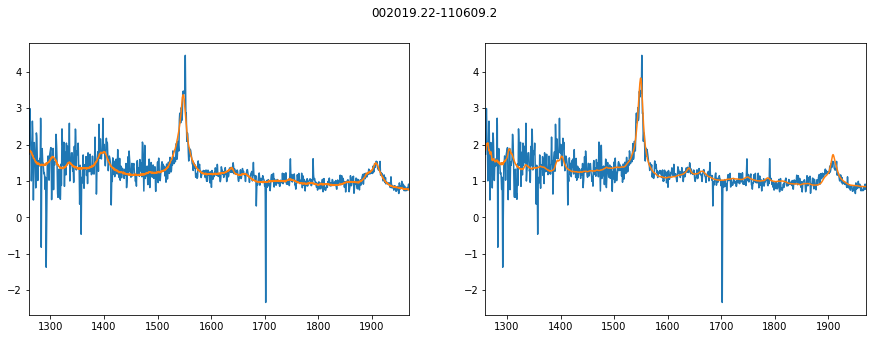

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


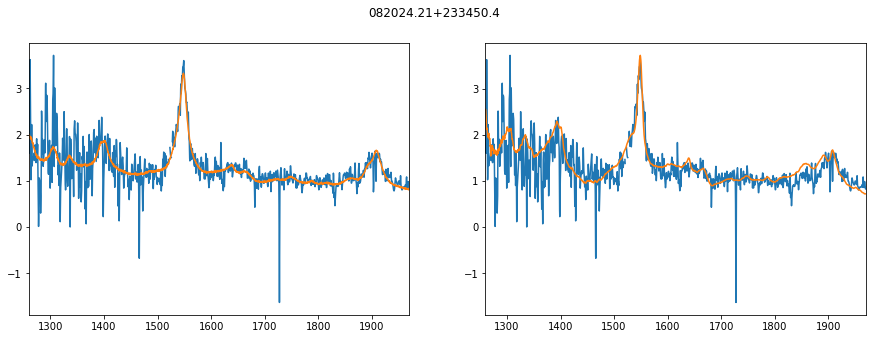

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


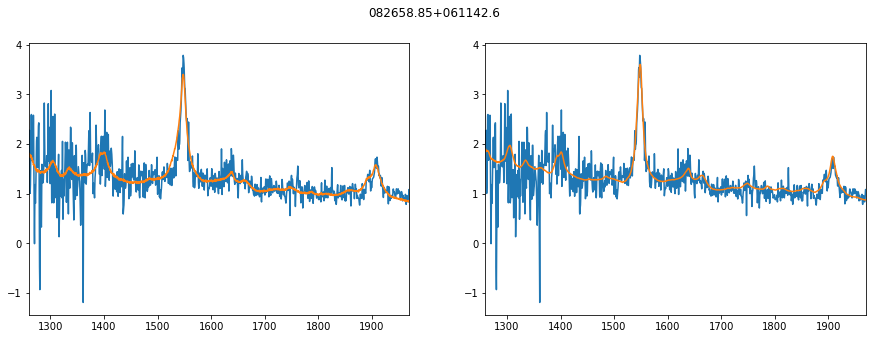

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


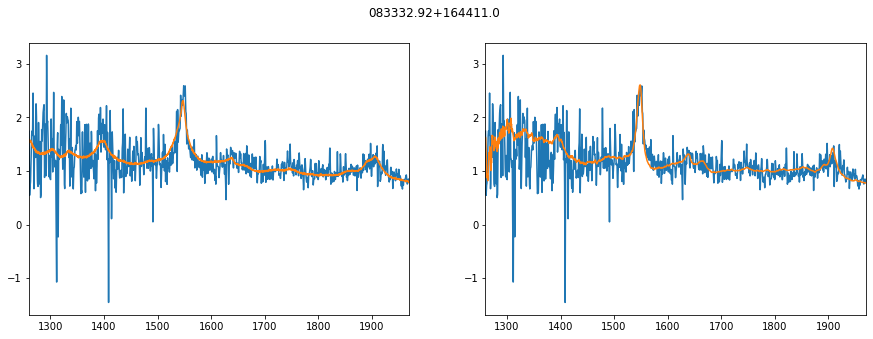

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


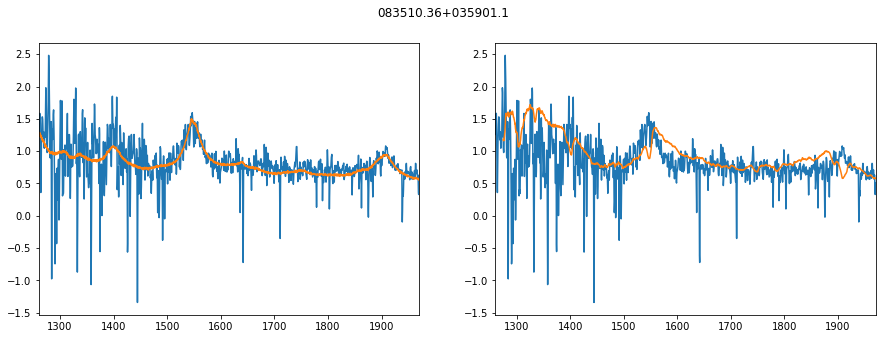

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


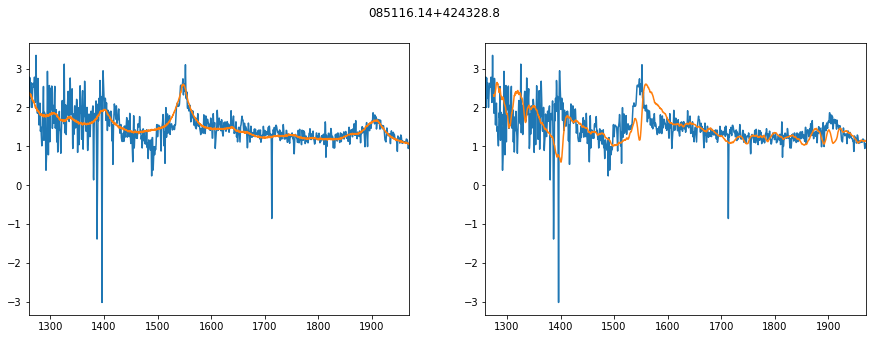

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


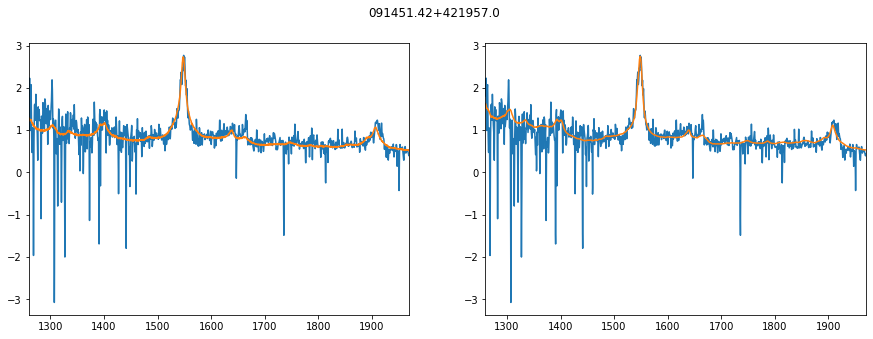

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


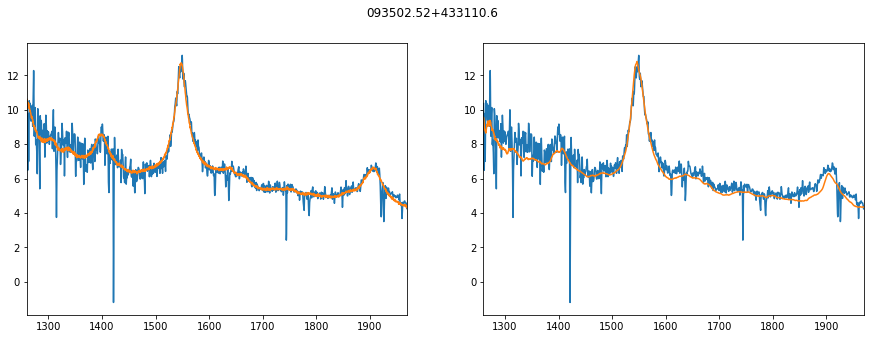

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


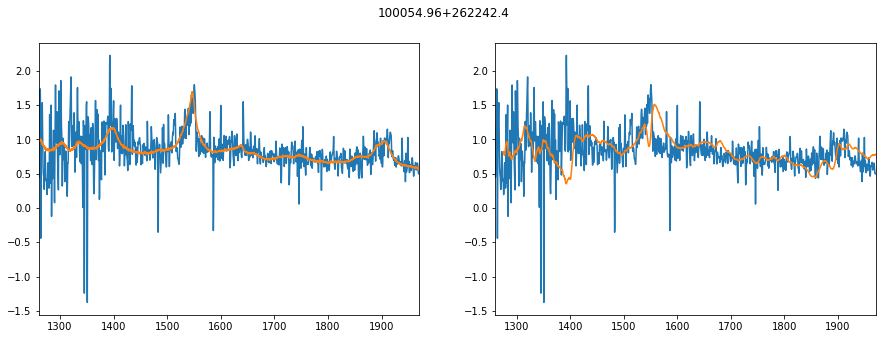

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


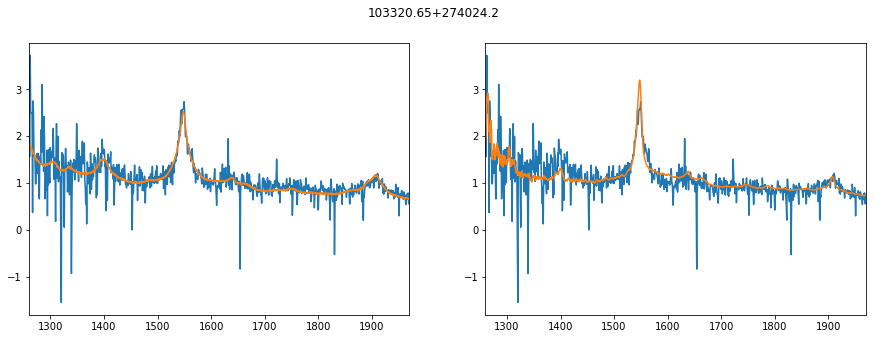

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


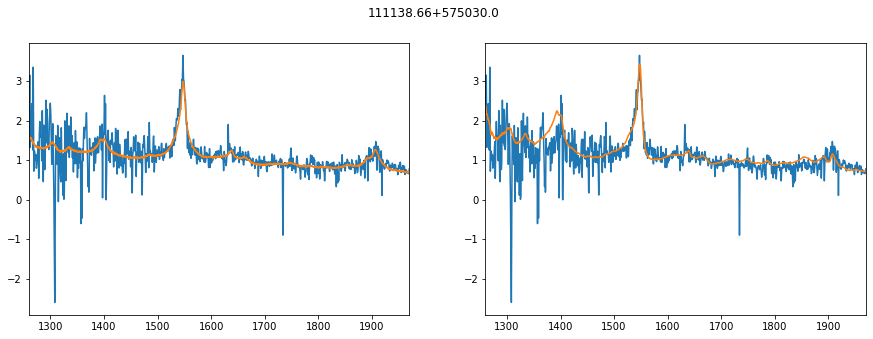

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


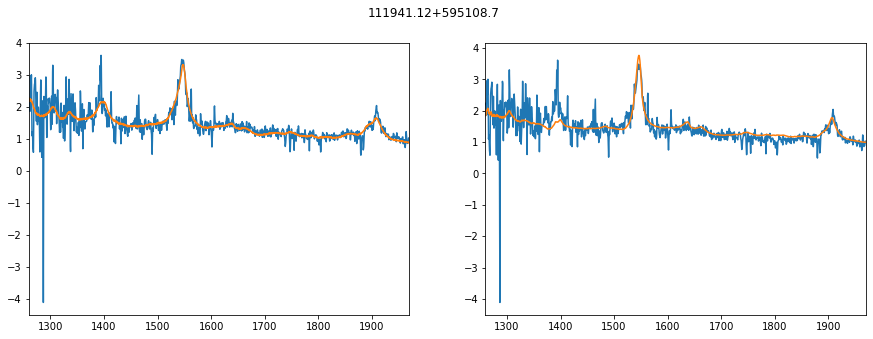

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


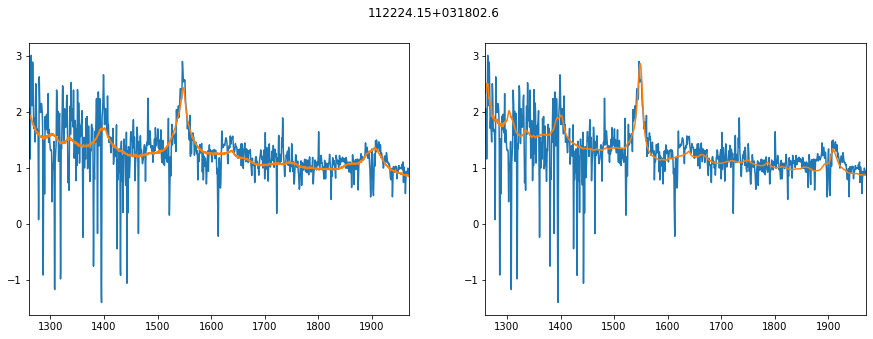

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


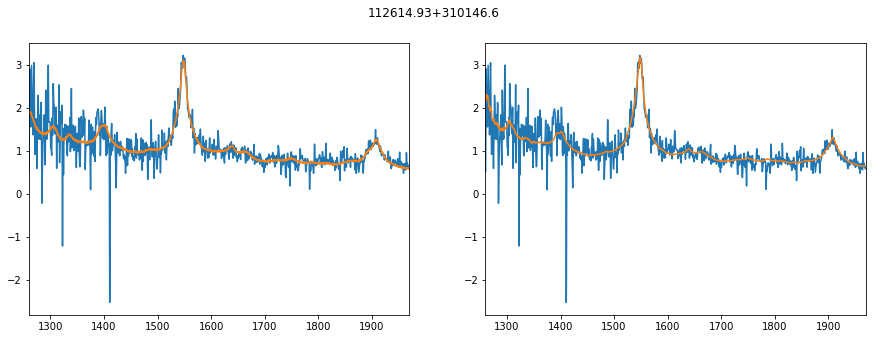

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


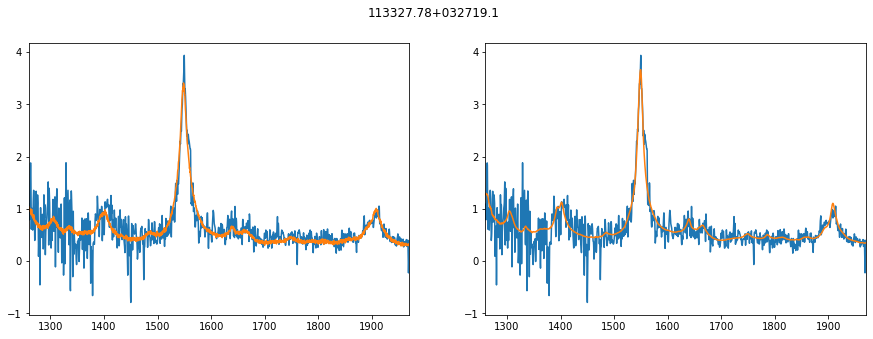

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


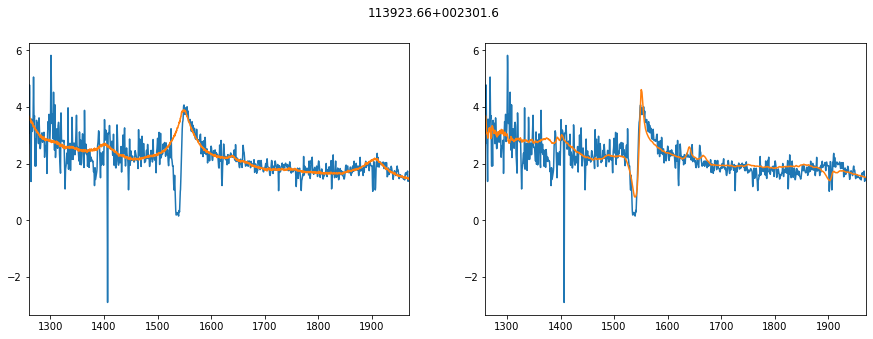

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


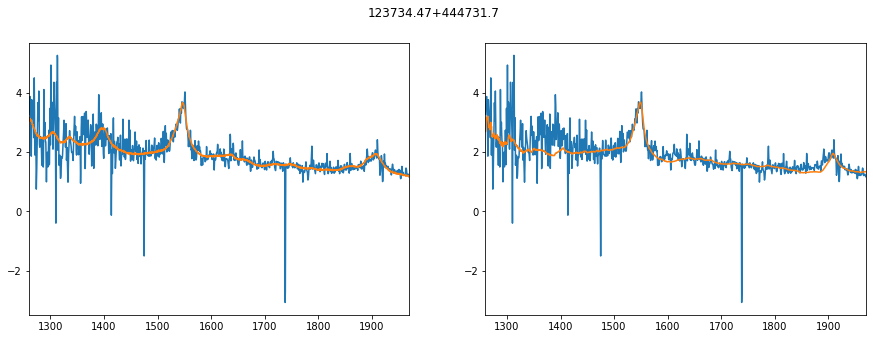

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


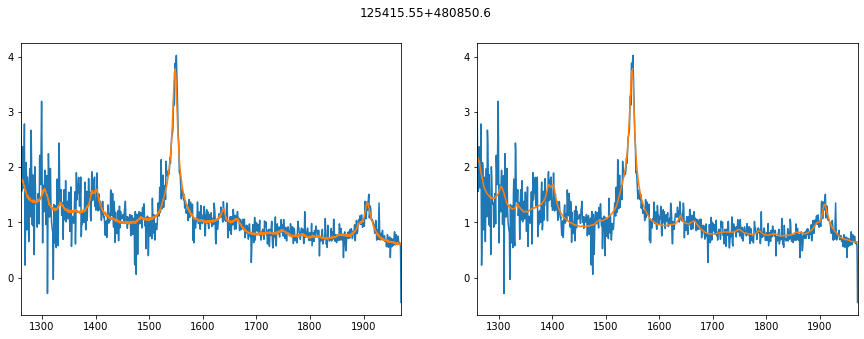

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


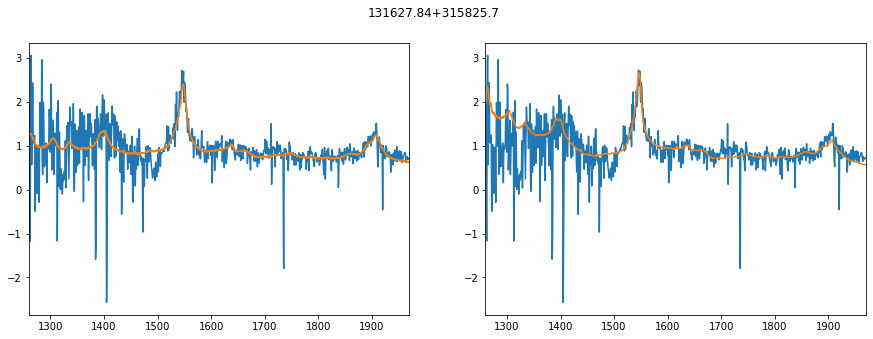

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


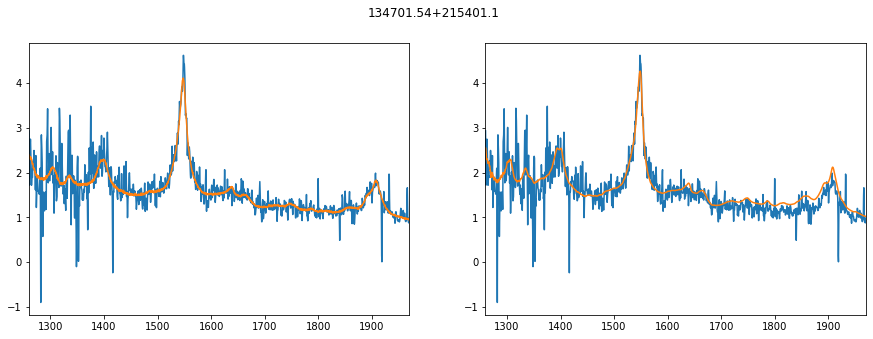

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


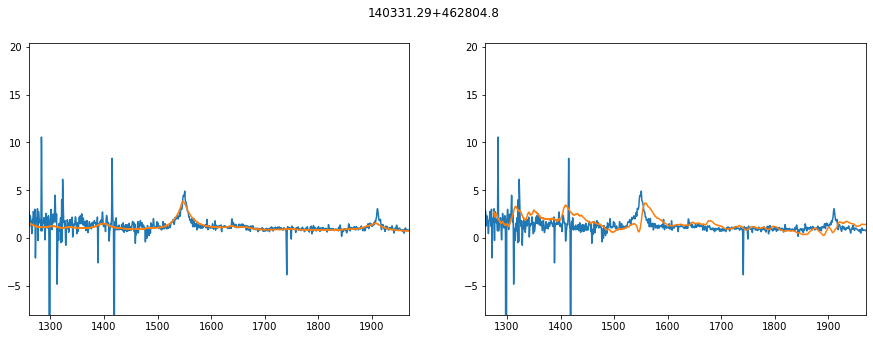

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


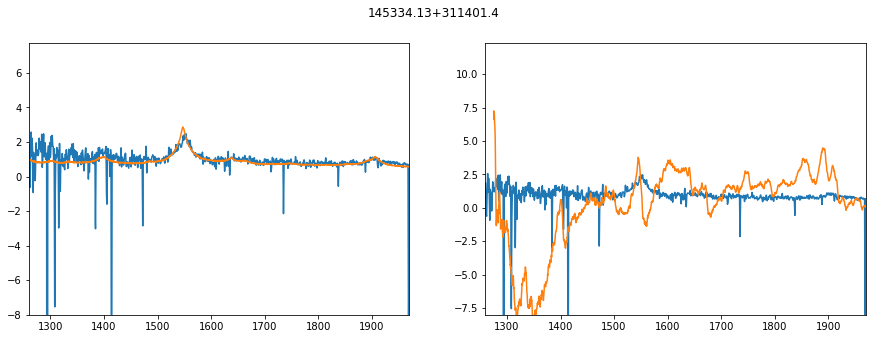

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


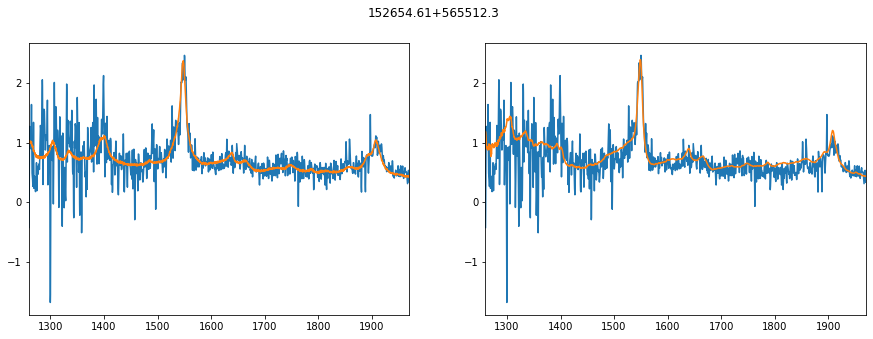

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


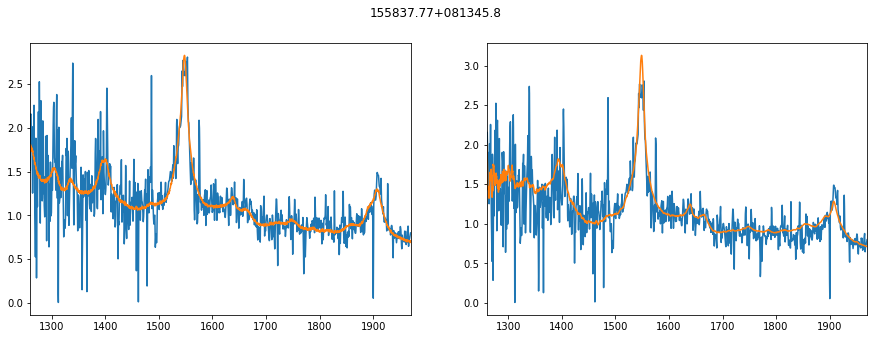

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


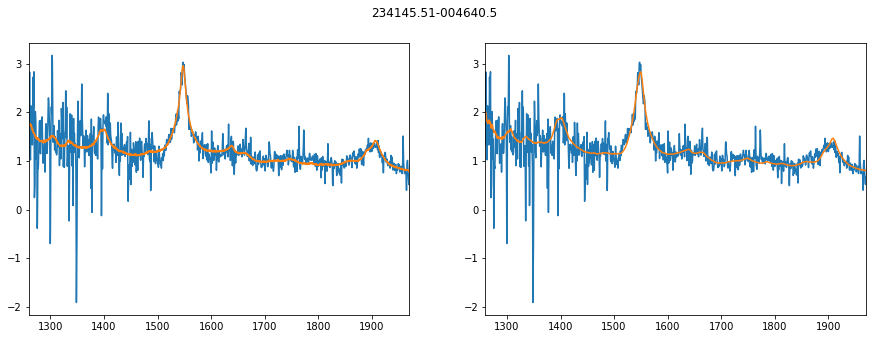

In [101]:
for i in range(len(hst)):
    #reconst = stacked_ae.predict(np.array([X_valid[i]]))
    if not np.isnan(hst_reconst[i]).any():
        fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(15,5))
        ax1.plot(wavelist[i], hst[i]*1e15)
        ax1.plot(wavelist[i], hst_reconst[i])

        ax2.plot(wavelist[i], hst[i]*1e15)
        ICAx, ICAy = bestICA(i)
        ax2.plot(ICAx, ICAy)

        ax1.set_ylim(max(ax1.get_ylim()[0], -8), ax1.get_ylim()[1])
        ax1.set_xlim(1260,1970)
        ax2.set_ylim(max(ax2.get_ylim()[0], -8), ax2.get_ylim()[1])
        ax2.set_xlim(1260,1970)
        plt.suptitle(dat["Identifier"][i])
        plt.show()

In [102]:
bestICA(0)

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


(array([1260.0855, 1260.3756, 1260.6659, ..., 2998.472 , 2999.1625,
        2999.8532]),
 array([1.85562311, 1.85342267, 1.87747444, ..., 0.50980153, 0.50569646,
        0.50825293]))

The autoencoder still "struggles" with BALs.  I think that can be (at least partially) fixed by just training on non-BALs (as Paul did to obtain the ICA components).  ``autoencoder2.ipynb`` shows that at least 1 latent parameter actually focuses on capturing BAL trough information.  Note that implementing masking isn't straightforward since there may always be different pixels that we want to mask, and we can't(?) simply turn different input neurons off and expect the encoder to do as good a job.  (Maybe this is possible, since there's a commonly used "Dropout" method that randomly ignores certain neurons.)

UPDATE: I added a mask at 1490-1546Å for CIV absorption.  It definitely helps reconstructing BALs.  Still not clear how to change the mask for each object.  Basically want to pass a mask array along with the spectra to ``stacked_ae.predict()``.

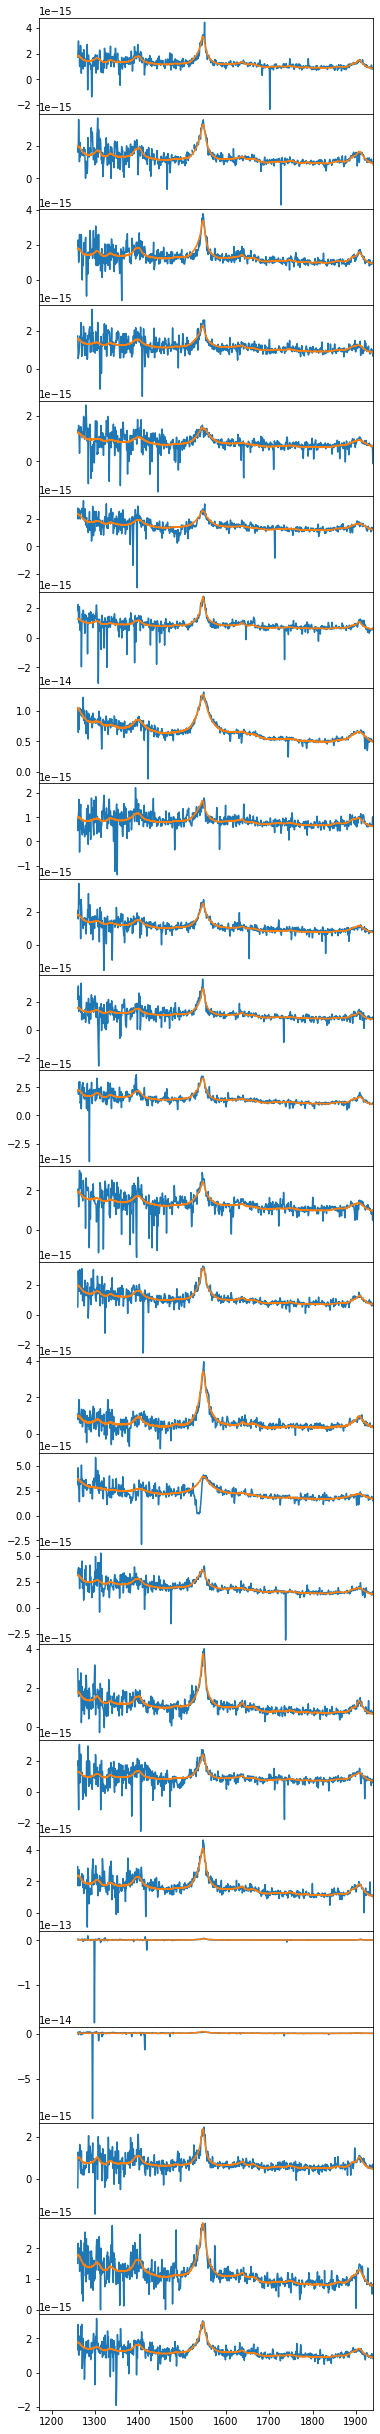

In [103]:
fig, axs = plt.subplots(len(hst), 1, figsize=(6,44), sharex=True)
plt.subplots_adjust(hspace=0)
for i in range(len(hst)):
    axs[i].plot(wavelist[i], hst[i])
    axs[i].plot(wavelist[i], hst_reconst[i]*1e-15)
    #axs[i].plot([1549,1549], [-5,5], "--k")
    #axs[i].set_ylim(max(axs[i].get_ylim()[0], -8), axs[i].get_ylim()[1])
    axs[i].set_xlim(1170,1940)
plt.show()

Can add Ly$\alpha$, but then CIV becomes sort of a "secondary feature" to the autoencoder and the Ly$\alpha$ absorption hurts its accuracy.  Any particular wavelength range that would be good to mask for Ly$\alpha$??

Save arrays back to files.

In [104]:
path_full = "../data/HST_SDSS_Data/"

In [105]:
for i,spec in enumerate(np.sort([f for f in os.listdir(path_full) if not f.startswith(".")])):
    print(spec[:30])

SDSSJ002019.22-110609.2HSTSDSS
SDSSJ082024.21+233450.4HSTSDSS
SDSSJ082658.85+061142.6HSTSDSS
SDSSJ083332.92+164411.0HSTSDSS
SDSSJ083510.36+035901.1HSTSDSS
SDSSJ085116.14+424328.8HSTSDSS
SDSSJ091451.42+421957.0HSTSDSS
SDSSJ093502.52+433110.6HSTSDSS
SDSSJ100054.96+262242.4HSTSDSS
SDSSJ103320.65+274024.2HSTSDSS
SDSSJ111138.66+575030.0HSTSDSS
SDSSJ111941.12+595108.7HSTSDSS
SDSSJ112224.15+031802.6HSTSDSS
SDSSJ112614.93+310146.6HSTSDSS
SDSSJ113327.78+032719.1HSTSDSS
SDSSJ113923.66+002301.6HSTSDSS
SDSSJ123734.47+444731.7HSTSDSS
SDSSJ125415.55+480850.6HSTSDSS
SDSSJ131627.84+315825.7HSTSDSS
SDSSJ134701.54+215401.1HSTSDSS
SDSSJ140331.29+462804.8HSTSDSS
SDSSJ145334.13+311401.4HSTSDSS
SDSSJ152654.61+565512.3HSTSDSS
SDSSJ155837.77+081345.8HSTSDSS
SDSSJ234145.51-004640.5HSTSDSS


In [106]:
def same_length(var, longvar):
    #append nans to the end of var to give it the same length as longvar
    return np.array(list(var) + [np.nan]*(len(longvar)-len(var)))

In [107]:
for i,spec in enumerate(np.sort([f for f in os.listdir(path_full) if not f.startswith(".")])):
    hdul_spec = fits.open(path_full+spec)
    
    flux   = hdul_spec[1].data["Flux"]
    wav   = hdul_spec[1].data["Wavelength"] 
    err    = hdul_spec[1].data["Flux Errors"]
    specmask   = hdul_spec[1].data["Masks"]
    
    AE = hst_reconst[i]*1e-15
    ICAx, ICAy = bestICA(i)
    
    t = Table([wav, flux, err, specmask, same_length(AE, flux), same_length(ICAy*1e-15, flux)], \
              names=('Wavelength', 'Flux', 'Flux Errors', 'Masks', 'AE_UV', 'ICA_UV'))
    t.write('../data/HST_Reconstructions_sudo/'+spec[:30]+'_wreconsts.fits', format='fits')
    #hdul.flush()
    hdul_spec.close()

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


In [108]:
hduspec = fits.open('../data/HST_Reconstructions_sudo/'+spec[:30]+'_wreconsts.fits')

In [109]:
hduspec

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1a599a8668>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x1a87576668>]

(1260.0, 1970.0)

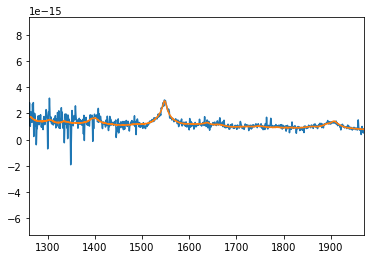

In [111]:
z = dat["Best_z"][dat["Identifier"]==spec[5:23]].values
w = hduspec[1].data["Wavelength"] / (1+z)
f = hduspec[1].data["Flux"]
r1 = hduspec[1].data["AE_UV"]
plt.plot(w,f)
plt.plot(w[(w>1260)&(w<1970)],r1[~np.isnan(r1)])
plt.xlim(1260,1970)

Good.

In [81]:
hduspec[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   48 / length of dimension 1                          
NAXIS2  =                 7432 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    6 / number of table fields                         
TTYPE1  = 'WAVE    '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'FLUX    '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'ERROR   '        

In [82]:
np.array(list(AE) + [np.nan]*(len(flux)-len(AE)))

array([1.77580023e-15, 1.77224174e-15, 1.79146367e-15, ...,
                  nan,            nan,            nan])

In [83]:
same_length(AE, ICAy)[-1900:]

array([9.13286911e-16, 9.04498415e-16, 8.90775634e-16, ...,
                  nan,            nan,            nan])

In [84]:
np.array(list(AE) + [np.nan]*5)[-7:]

array([8.14634202e-16, 7.91511049e-16,            nan,            nan,
                  nan,            nan,            nan])

In [85]:
np.nan

nan